In [ ]:
## Customer Segmentation & CLTV Prediction for CRM Strategy (FLO E-commerce)

## Author: Sera Park  
## Project Type: CRM Analysis, Customer Segmentation, CLTV Prediction  
## Tech Stack: Python, Pandas, Seaborn, Matplotlib, Scikit-learn  
## Dataset: [Kaggle – FLO E-commerce Dataset (20K)](https://www.kaggle.com/datasets/emrebilir/flo-data-20k-csv)  
## Purpose of Project: Derive actionable customer insights for personalized marketing through segmentation and Customer Lifetime Value (CLTV) modeling.


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.makedirs('images', exist_ok=True)

def save_fig(filename):
    plt.savefig(f'images/{filename}', dpi=300, bbox_inches='tight')


In [3]:
# path = '/flo_data_20k.csv'
flo_data = pd.read_csv(path)

In [4]:
flo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

# Data Preprocessing

### + column : total order numbers and total order amount


In [5]:
flo_data['order_num_total'] = flo_data['order_num_total_ever_online'] + flo_data['order_num_total_ever_offline']
flo_data['customer_value_total'] = flo_data['customer_value_total_ever_online'] + flo_data['customer_value_total_ever_offline']


### change type : date related columns

In [6]:
date_columns = flo_data.columns[flo_data.columns.str.contains('date')]
flo_data[date_columns] = flo_data[date_columns].apply(pd.to_datetime)

### + column : language Türkiye - > english

In [7]:
category_mapping = {
    'AKTIFCOCUK': 'ACTIVE CHILD',
    'AKTIFSPOR':  'ACTIVE SPORTS',
    'COCUK': 'CHILD',
    'ERKEK': 'MAN',
    'KADIN': 'WOMAN',
}

In [8]:
for idx, categories in enumerate(flo_data['interested_in_categories_12']):
    for turkish, eng in category_mapping.items():
        categories = categories.replace(turkish, eng)
    flo_data.loc[idx, 'interested_in_categories_12_eng'] = categories

In [9]:
print(flo_data.info())
print(flo_data.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

# Customer Behavior Analysis

### online vs offline

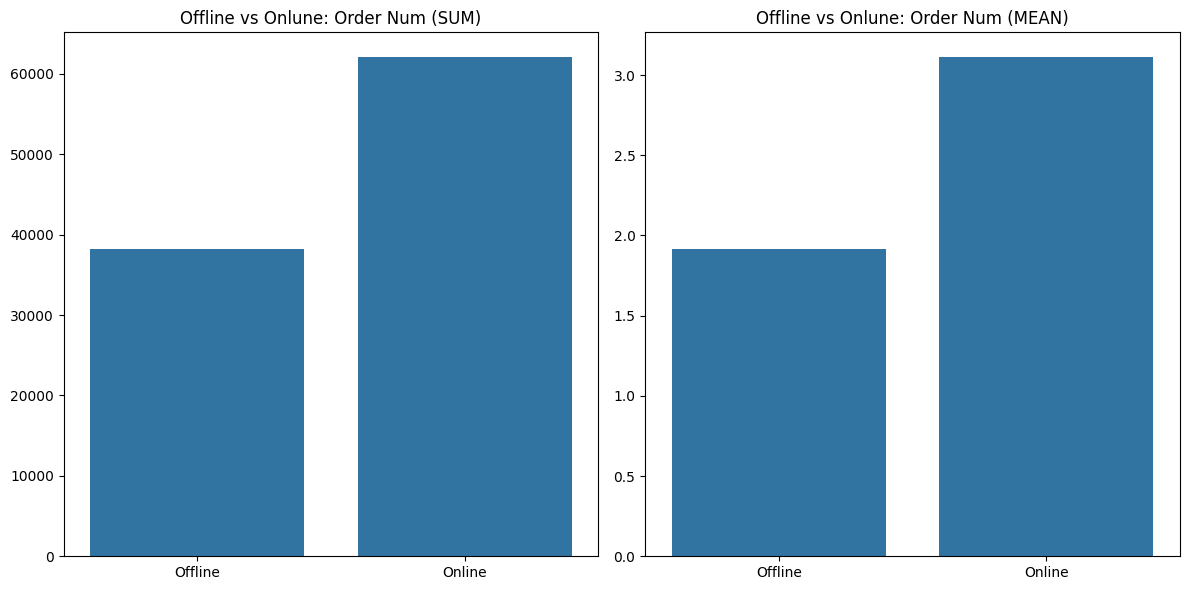

In [10]:
#1) Order Num
#sum
off_sum_val = sum(flo_data['order_num_total_ever_offline'])
on_sum_val = sum(flo_data['order_num_total_ever_online'])

#mean
off_mean_val = np.mean(flo_data['order_num_total_ever_offline'])
on_mean_val = np.mean(flo_data['order_num_total_ever_online'])

x = ['Offline', 'Online']
y_sum = [off_sum_val, on_sum_val]
y_mean = [off_mean_val, on_mean_val]

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.barplot(x=x, y=y_sum)
plt.title('Offline vs Onlune: Order Num (SUM)')

plt.subplot(1,2,2)
sns.barplot(x=x, y=y_mean)
plt.title('Offline vs Onlune: Order Num (MEAN)')

plt.tight_layout()
save_fig('order_num_sum_mean.png')

plt.show()

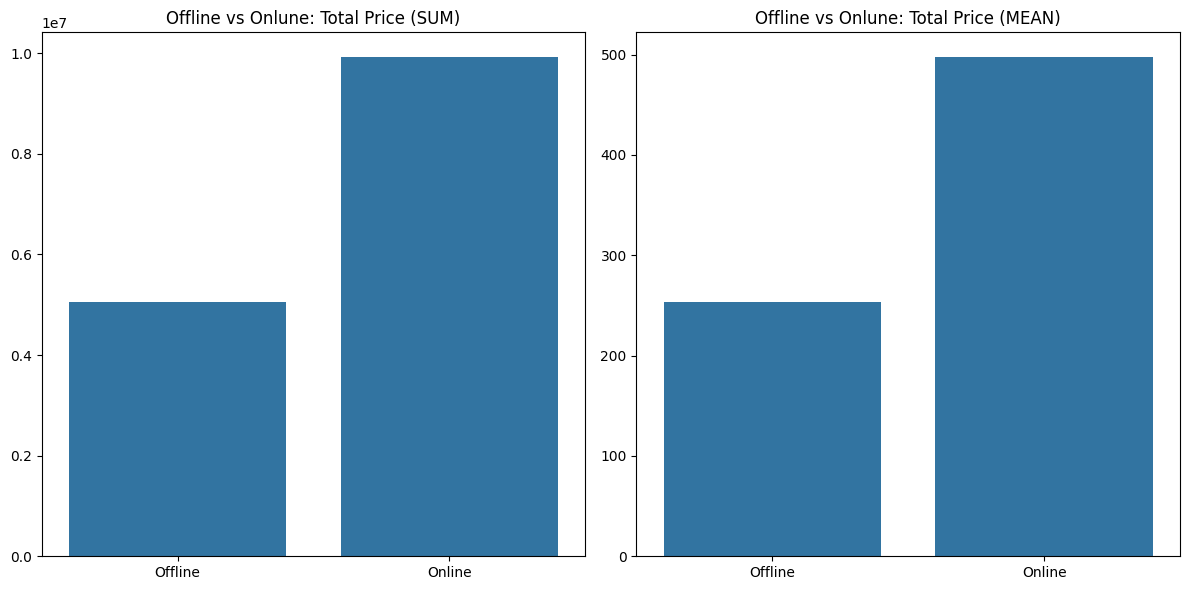

In [11]:
#2) Total Price

# sum
off_sum_val = sum(flo_data['customer_value_total_ever_offline'].values)
on_sum_val = sum(flo_data['customer_value_total_ever_online'].values)

# mean
off_mean_val = np.mean(flo_data['customer_value_total_ever_offline'].values)
on_mean_val = np.mean(flo_data['customer_value_total_ever_online'].values)

y_sum = [off_sum_val, on_sum_val]
y_mean = [off_mean_val, on_mean_val]

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.barplot(x=x, y=y_sum)
plt.title('Offline vs Onlune: Total Price (SUM)')

plt.subplot(1,2,2)
sns.barplot(x=x, y=y_mean)
plt.title('Offline vs Onlune: Total Price (MEAN)')

plt.tight_layout()
save_fig('total_price_sum_mean.png')

plt.show()


In [12]:
#3) Last Order Date

offline_series = flo_data.groupby('last_order_date_offline')['master_id'].count().to_frame()
online_series = flo_data.groupby('last_order_date_online')['master_id'].count().to_frame()

# filtering
offline_series = offline_series[offline_series.index > '2020']
online_series = online_series[online_series.index > '2020']

In [13]:
display(offline_series)

offline_series.resample('M').sum() #'D', 'H', 'Y'

,master_id
last_order_date_offline,
2020-01-02,27
2020-01-03,23
2020-01-04,48
2020-01-05,37
2020-01-06,30
...,...
2021-05-24,66
2021-05-25,57
2021-05-26,69


,master_id
last_order_date_offline,
2020-01-31,989
2020-02-29,992
2020-03-31,502
2020-04-30,0
2020-05-31,87
2020-06-30,604
2020-07-31,1421
2020-08-31,733
2020-09-30,609


In [14]:
offline_series = offline_series.resample('M').sum()
online_series = online_series.resample('M').sum()

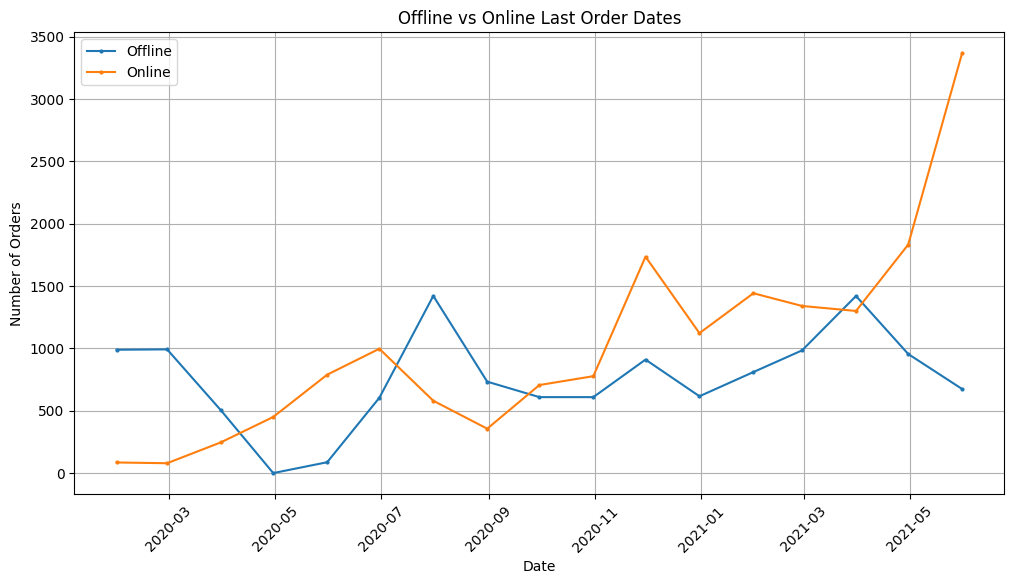

In [15]:
plt.figure(figsize=(12, 6))

plt.plot(offline_series.index, offline_series.values, label='Offline', marker='o', linestyle='-', markersize=2)
plt.plot(online_series.index, online_series.values, label='Online', marker='o', linestyle='-', markersize=2)

plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.title('Offline vs Online Last Order Dates')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
save_fig('offline_vs_online_last_order_dates.png')

plt.show()

In [16]:
#4) 요일

flo_data['last_order_day_offline'] = pd.to_datetime(flo_data['last_order_date_offline']).dt.day_name()
flo_data['last_order_day_online'] = pd.to_datetime(flo_data['last_order_date_online']).dt.day_name()

In [17]:
offline_order_day_counts = flo_data.groupby('last_order_day_offline')['master_id'].count().to_frame()
online_order_day_counts = flo_data.groupby('last_order_day_online')['master_id'].count().to_frame()

In [18]:
online_order_day_counts

,master_id
last_order_day_online,
Friday,2699
Monday,2934
Saturday,2701
Sunday,2990
Thursday,2730
Tuesday,2977
Wednesday,2914


In [19]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

offline_order_day_counts = offline_order_day_counts.reindex(days_of_week)
online_order_day_counts = online_order_day_counts.reindex(days_of_week)

In [20]:
offline_order_day_counts = offline_order_day_counts.reset_index().rename(columns={'master_id': 'order_count'})
online_order_day_counts = online_order_day_counts.reset_index().rename(columns={'master_id': 'order_count'})

In [21]:
online_order_day_counts

,last_order_day_online,order_count
0,Monday,2934
1,Tuesday,2977
2,Wednesday,2914
3,Thursday,2730
4,Friday,2699
5,Saturday,2701
6,Sunday,2990


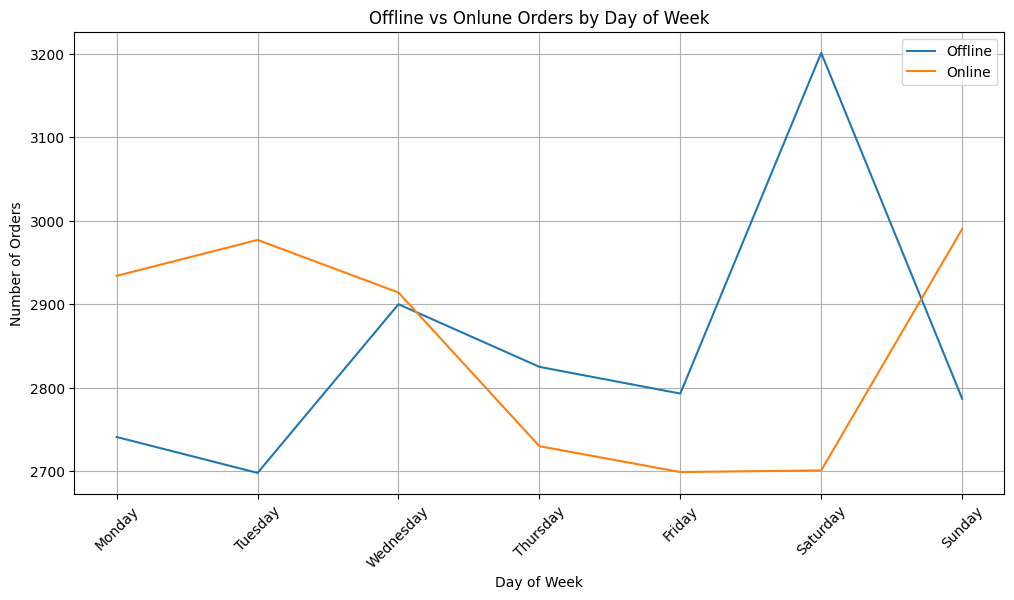

In [22]:
plt.figure(figsize=(12, 6))

sns.lineplot(x=offline_order_day_counts['last_order_day_offline'], y=offline_order_day_counts['order_count'], label='Offline')
sns.lineplot(x=online_order_day_counts['last_order_day_online'], y=online_order_day_counts['order_count'], label='Online')

plt.title('Offline vs Onlune Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

## Order Chanel Analysis

In [23]:
channel_list = flo_data['last_order_channel'].unique()
print(channel_list)

['Offline' 'Mobile' 'Android App' 'Desktop' 'Ios App']


/var/folders/gv/ldw6vdkx3tn58ym0_xrj0lg00000gn/T/ipykernel_5425/529253105.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='pastel')


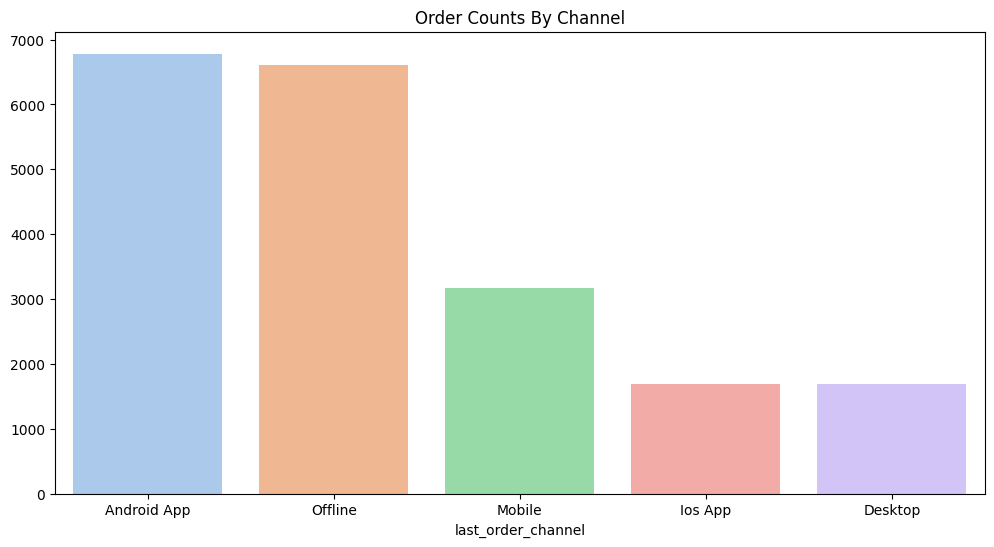

In [24]:
order_channel_counts = flo_data['last_order_channel'].value_counts()

x = order_channel_counts.index
y = order_channel_counts.values

plt.figure(figsize=(12, 6))

sns.barplot(x=x, y=y, palette='pastel')
plt.title('Order Counts By Channel')

plt.show()

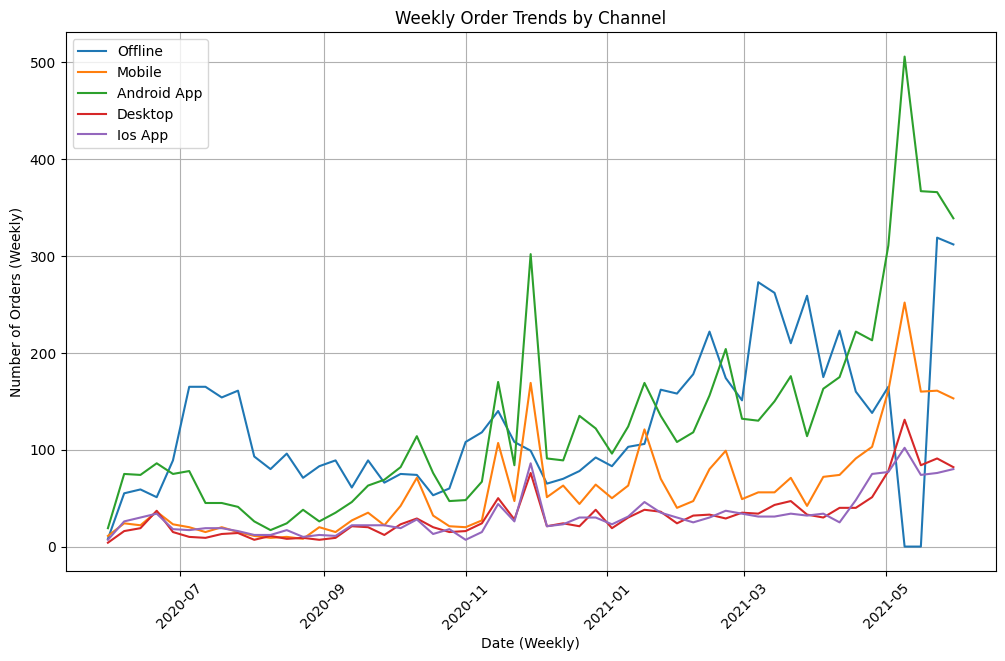

In [25]:
channel_groups = flo_data.groupby('last_order_channel')

plt.figure(figsize=(12, 7))
for channel in channel_list:
    channel_data = channel_groups.get_group(channel)

    if channel == 'Offline':
        channel_data = channel_data.set_index('last_order_date_offline')
        channel_weekly = channel_data.resample('W')['master_id'].count()
    else:
        channel_data = channel_data.set_index('last_order_date_online')
        channel_weekly = channel_data.resample('W')['master_id'].count()
    
    plt.plot(channel_weekly.index, channel_weekly.values, label=channel)

plt.xlabel('Date (Weekly)')
plt.ylabel('Number of Orders (Weekly)')
plt.title('Weekly Order Trends by Channel')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
save_fig('weekly_order_trends_by_channel.png')


plt.show()

In [26]:
channel_list

array(['Offline', 'Mobile', 'Android App', 'Desktop', 'Ios App'],
      dtype=object)

In [27]:
category_list = []

for categories in flo_data['interested_in_categories_12_eng']:
    categories = categories[1:-1] # 대괄호 제거
    categories = categories.split(', ') # ,기준 나누기

    for category in categories:
        category = category.strip()

        if category not in category_list:
            category_list.append(category)

print(category_list)

['WOMAN', 'MAN', 'CHILD', 'ACTIVE SPORTS', 'ACTIVE CHILD', '']


In [28]:
channel_category_count = {}

for channel in channel_list:
    channel_category_count[channel] = {category: 0 for category in category_list}

channel_category_count

{'Offline': {'WOMAN': 0,
  'MAN': 0,
  'CHILD': 0,
  'ACTIVE SPORTS': 0,
  'ACTIVE CHILD': 0,
  '': 0},
 'Mobile': {'WOMAN': 0,
  'MAN': 0,
  'CHILD': 0,
  'ACTIVE SPORTS': 0,
  'ACTIVE CHILD': 0,
  '': 0},
 'Android App': {'WOMAN': 0,
  'MAN': 0,
  'CHILD': 0,
  'ACTIVE SPORTS': 0,
  'ACTIVE CHILD': 0,
  '': 0},
 'Desktop': {'WOMAN': 0,
  'MAN': 0,
  'CHILD': 0,
  'ACTIVE SPORTS': 0,
  'ACTIVE CHILD': 0,
  '': 0},
 'Ios App': {'WOMAN': 0,
  'MAN': 0,
  'CHILD': 0,
  'ACTIVE SPORTS': 0,
  'ACTIVE CHILD': 0,
  '': 0}}

In [29]:
channel_category_data = flo_data[['last_order_channel', 'interested_in_categories_12_eng']]

for index, row in channel_category_data.iterrows():
    channel = row['last_order_channel']
    categories = row['interested_in_categories_12_eng'][1:-1]

    for category in categories.split(', '):
        category = category.strip()
        channel_category_count[channel][category] += 1

In [30]:
channel_category_count

{'Offline': {'WOMAN': 3093,
  'MAN': 2115,
  'CHILD': 1485,
  'ACTIVE SPORTS': 2871,
  'ACTIVE CHILD': 1074,
  '': 496},
 'Mobile': {'WOMAN': 1065,
  'MAN': 806,
  'CHILD': 563,
  'ACTIVE SPORTS': 1344,
  'ACTIVE CHILD': 502,
  '': 472},
 'Android App': {'WOMAN': 2320,
  'MAN': 2573,
  'CHILD': 1506,
  'ACTIVE SPORTS': 3397,
  'ACTIVE CHILD': 1330,
  '': 751},
 'Desktop': {'WOMAN': 574,
  'MAN': 548,
  'CHILD': 293,
  'ACTIVE SPORTS': 774,
  'ACTIVE CHILD': 246,
  '': 224},
 'Ios App': {'WOMAN': 551,
  'MAN': 600,
  'CHILD': 310,
  'ACTIVE SPORTS': 818,
  'ACTIVE CHILD': 285,
  '': 192}}

In [31]:
channel_category_count_t = pd.DataFrame(channel_category_count).T
channel_category_count_t

,WOMAN,MAN,CHILD,ACTIVE SPORTS,ACTIVE CHILD,
Offline,3093,2115,1485,2871,1074,496
Mobile,1065,806,563,1344,502,472
Android App,2320,2573,1506,3397,1330,751
Desktop,574,548,293,774,246,224
Ios App,551,600,310,818,285,192


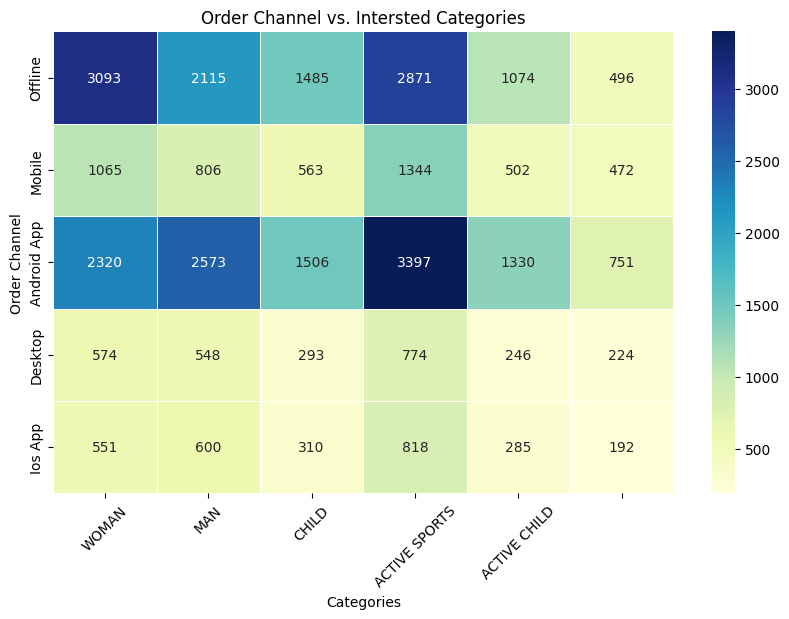

In [32]:
plt.figure(figsize=(10, 6))
sns.heatmap(channel_category_count_t, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Order Channel vs. Intersted Categories')
plt.xlabel('Categories')
plt.ylabel('Order Channel')
plt.xticks(rotation=45)
save_fig('heatmap_channel_vs_categories.png')

plt.show()

In [33]:
nested = flo_data[['last_order_channel', 'interested_in_categories_12_eng']].value_counts().to_frame()
nested = nested.reset_index()
nested = nested.rename(columns={0: 'count'})
nested = nested.sort_values(by=['last_order_channel', 'count'], ascending=[True, False]).reset_index(drop=True)

nested

,last_order_channel,interested_in_categories_12_eng,count
0,Android App,[ACTIVE SPORTS],1199
1,Android App,[],751
2,Android App,[MAN],735
3,Android App,[WOMAN],511
4,Android App,"[MAN, ACTIVE SPORTS]",483
...,...,...,...
155,Offline,"[ACTIVE CHILD, MAN, WOMAN, ACTIVE SPORTS]",36
156,Offline,"[ACTIVE CHILD, MAN, WOMAN]",34
157,Offline,"[ACTIVE CHILD, MAN, CHILD]",33
158,Offline,"[ACTIVE CHILD, MAN, ACTIVE SPORTS]",28


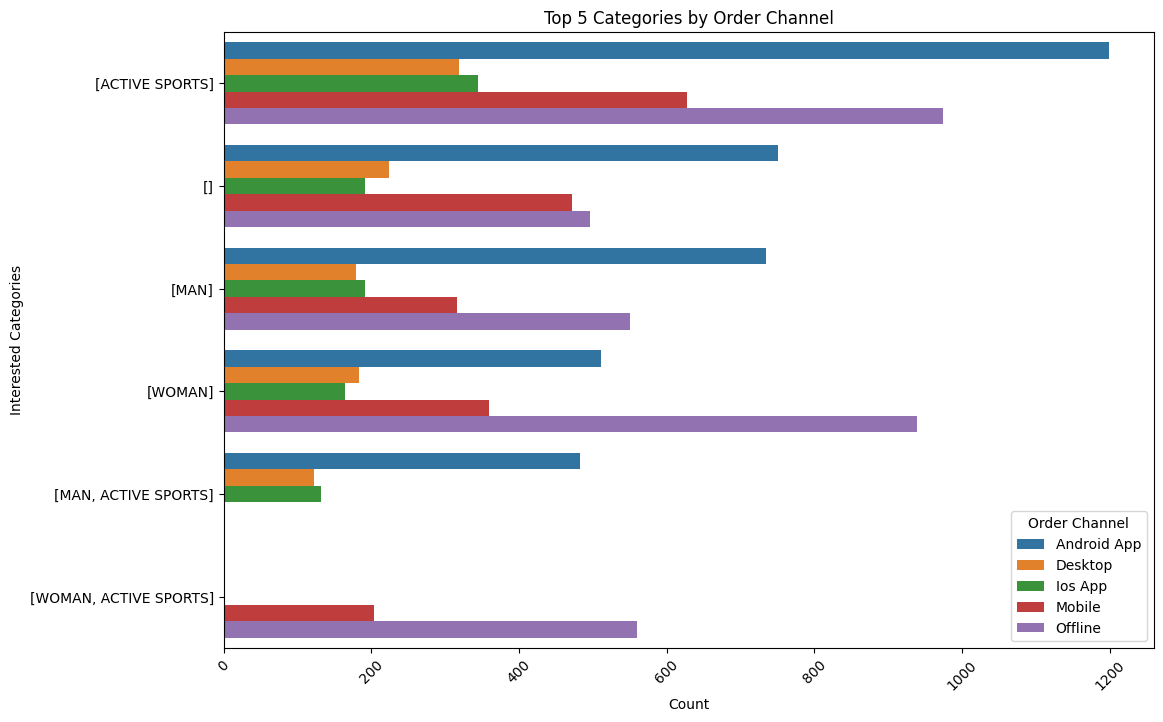

In [34]:
top_categories_by_channel = nested.groupby('last_order_channel').head(5)

plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='interested_in_categories_12_eng', hue='last_order_channel', data=top_categories_by_channel)
plt.title('Top 5 Categories by Order Channel')
plt.xlabel('Count')
plt.ylabel('Interested Categories')
plt.xticks(rotation=45)
plt.legend(title='Order Channel')
save_fig('top5_categories_by_channel.png')

plt.show()

## Categories Analysis

In [35]:
flo_data['interested_in_categories_12_eng']

0                                   [WOMAN]
1        [MAN, CHILD, WOMAN, ACTIVE SPORTS]
2                              [MAN, WOMAN]
3                     [ACTIVE CHILD, CHILD]
4                           [ACTIVE SPORTS]
                        ...                
19940                  [MAN, ACTIVE SPORTS]
19941                       [ACTIVE SPORTS]
19942                       [ACTIVE SPORTS]
19943                  [MAN, ACTIVE SPORTS]
19944                [WOMAN, ACTIVE SPORTS]
Name: interested_in_categories_12_eng, Length: 19945, dtype: object

In [36]:
type(flo_data['interested_in_categories_12_eng'][1])

str

In [37]:
categories_count = {category: 0 for category in category_list}

print(categories_count)

{'WOMAN': 0, 'MAN': 0, 'CHILD': 0, 'ACTIVE SPORTS': 0, 'ACTIVE CHILD': 0, '': 0}


In [38]:
for categories in flo_data['interested_in_categories_12_eng']:
    categories = categories[1:-1]
    categories = categories.split(', ')

    for category in categories:
        categories_count[category] += 1

In [39]:
print(categories_count)

{'WOMAN': 7603, 'MAN': 6642, 'CHILD': 4157, 'ACTIVE SPORTS': 9204, 'ACTIVE CHILD': 3437, '': 2135}


/var/folders/gv/ldw6vdkx3tn58ym0_xrj0lg00000gn/T/ipykernel_5425/2939763811.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette='pastel')


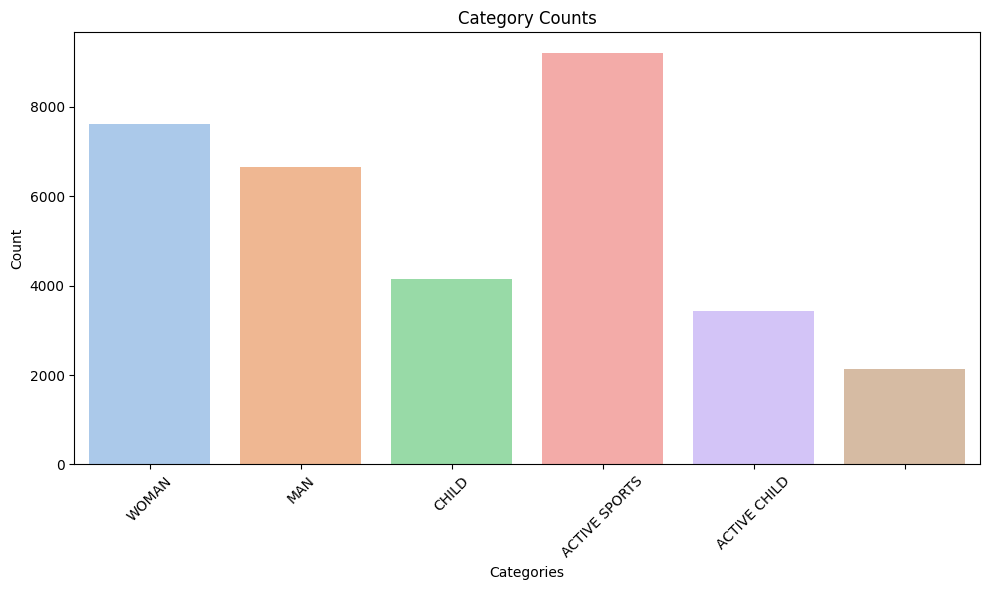

In [40]:
categories = list(categories_count.keys())
counts = list(categories_count.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=counts, palette='pastel')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Category Counts')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

/var/folders/gv/ldw6vdkx3tn58ym0_xrj0lg00000gn/T/ipykernel_5425/3738294657.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette='pastel')


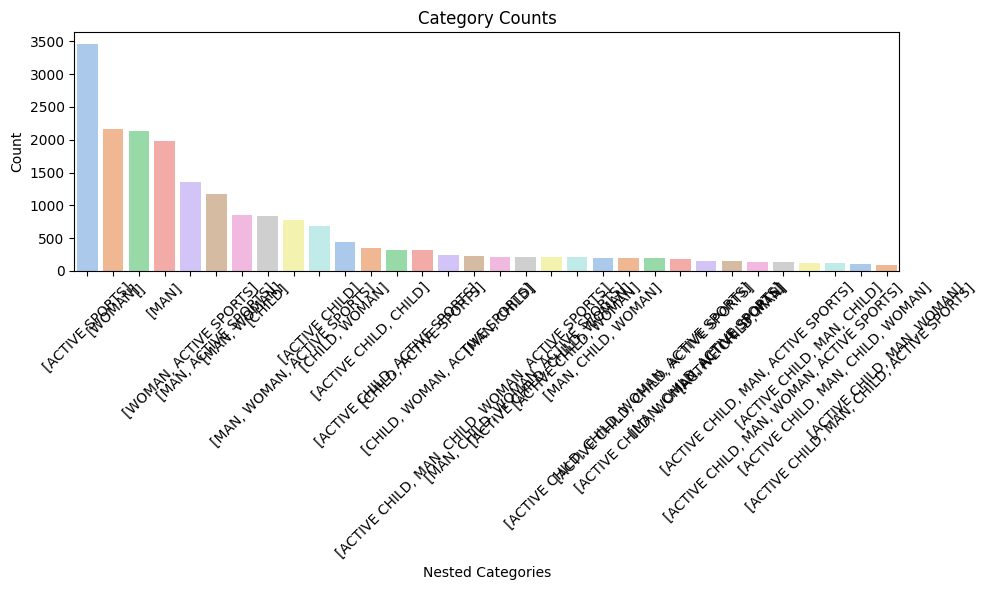

In [41]:
nested_categories_count = flo_data['interested_in_categories_12_eng'].value_counts()

categories = list(nested_categories_count.index)
counts = list(nested_categories_count.values)

plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=counts, palette='pastel')
plt.xlabel('Nested Categories')
plt.ylabel('Count')
plt.title('Category Counts')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/var/folders/gv/ldw6vdkx3tn58ym0_xrj0lg00000gn/T/ipykernel_5425/4092793134.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette='pastel')


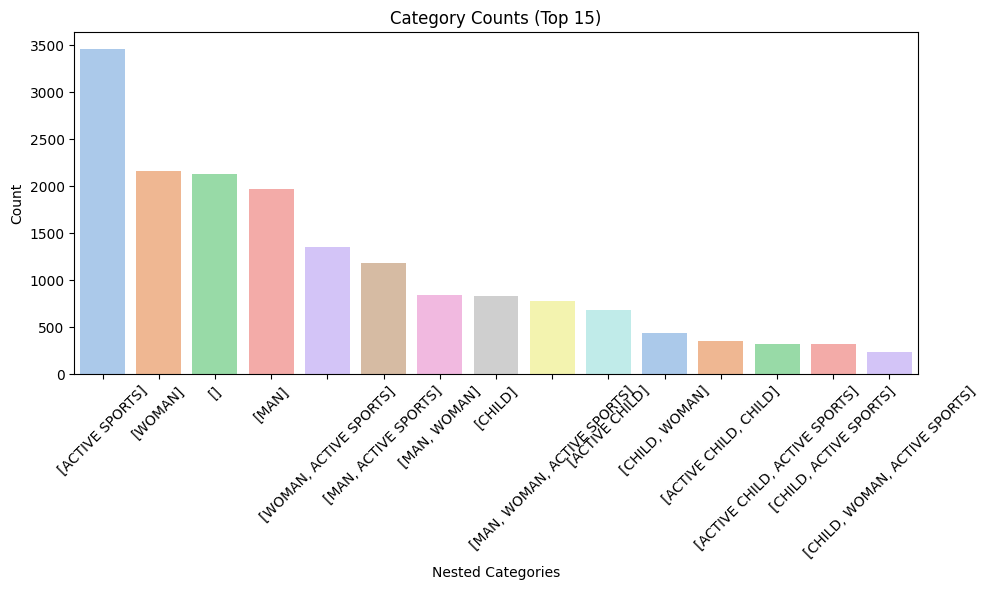

In [42]:
index_top_15 = categories[:15]

nested_categories_count_top15 = nested_categories_count[index_top_15]

categories = list(nested_categories_count_top15.index)
counts = list(nested_categories_count_top15.values)

plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=counts, palette='pastel')
plt.xlabel('Nested Categories')
plt.ylabel('Count')
plt.title('Category Counts (Top 15)')
plt.xticks(rotation=45)

plt.tight_layout()
save_fig('category_counts_top15.png')

plt.show()

## Customer Analysis

In [43]:
flo_data['order_num_total'].describe()

count    19945.000000
mean         5.024768
std          4.742707
min          2.000000
25%          3.000000
50%          4.000000
75%          6.000000
max        202.000000
Name: order_num_total, dtype: float64

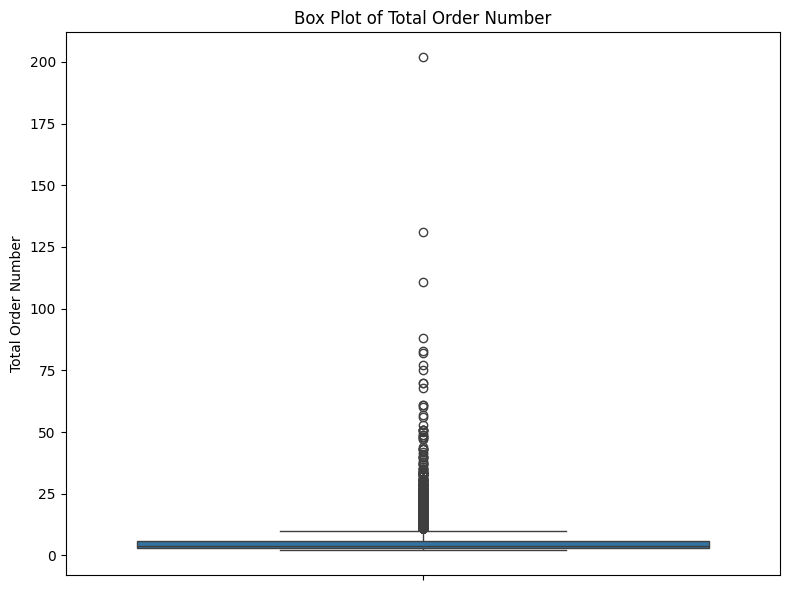

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=flo_data, y='order_num_total')
plt.ylabel('Total Order Number')
plt.title('Box Plot of Total Order Number')

plt.tight_layout()
save_fig('boxplot_total_order_number.png')

plt.show()

In [45]:
def remove_outlier(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    upper_bound = q3 + (1.5*iqr)
    lower_bound = q1 - (1.5*iqr)

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [46]:
flo_data = remove_outlier(flo_data, 'order_num_total')

In [47]:
flo_data['order_num_total'].describe()

count    18546.000000
mean         4.122938
std          2.063951
min          2.000000
25%          2.000000
50%          4.000000
75%          5.000000
max         10.000000
Name: order_num_total, dtype: float64

In [48]:
data = flo_data['order_num_total'].value_counts().reset_index()
data

,order_num_total,count
0,2.0,4717
1,3.0,4377
2,4.0,3127
3,5.0,2145
4,6.0,1515
5,7.0,1053
6,8.0,693
7,9.0,529
8,10.0,390


/var/folders/gv/ldw6vdkx3tn58ym0_xrj0lg00000gn/T/ipykernel_5425/2243613960.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='order_num_total', y='count', palette='mako')


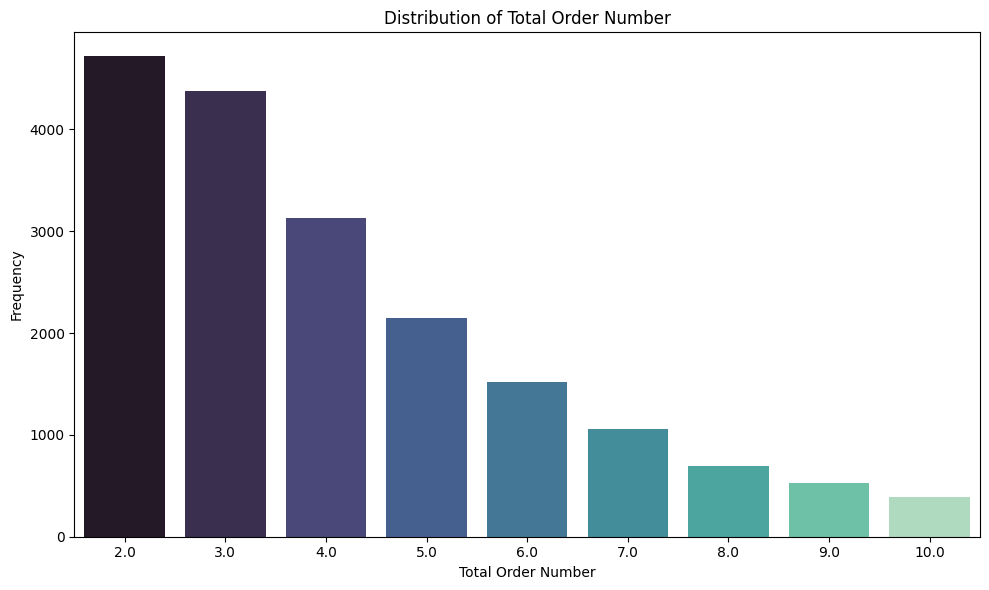

In [49]:
data = flo_data['order_num_total'].value_counts().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='order_num_total', y='count', palette='mako')
plt.xlabel('Total Order Number')
plt.ylabel('Frequency')
plt.title('Distribution of Total Order Number')

plt.tight_layout()
plt.show()

In [50]:
flo_data['customer_value_total'].describe()

count    18546.000000
mean       622.497358
std        450.073646
min         44.980000
25%        326.750000
50%        511.875000
75%        800.552500
max      20706.340000
Name: customer_value_total, dtype: float64

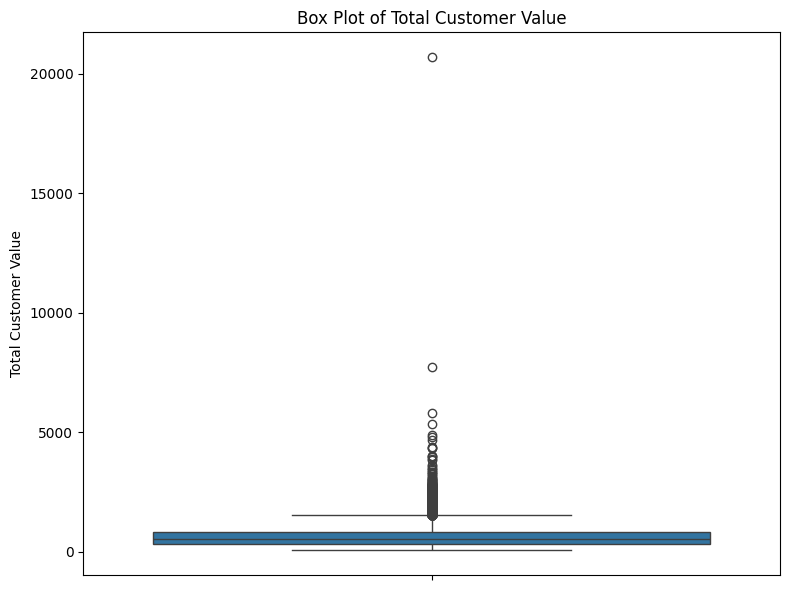

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=flo_data, y='customer_value_total')
plt.ylabel('Total Customer Value')
plt.title('Box Plot of Total Customer Value')

plt.tight_layout()
save_fig('boxplot_total_customer_value.png')

plt.show()

In [52]:
flo_data = remove_outlier(flo_data, 'customer_value_total')

In [53]:
flo_data['customer_value_total'].describe()

count    17812.000000
mean       566.921361
std        316.530524
min         44.980000
25%        319.970000
50%        495.915000
75%        756.425000
max       1510.080000
Name: customer_value_total, dtype: float64

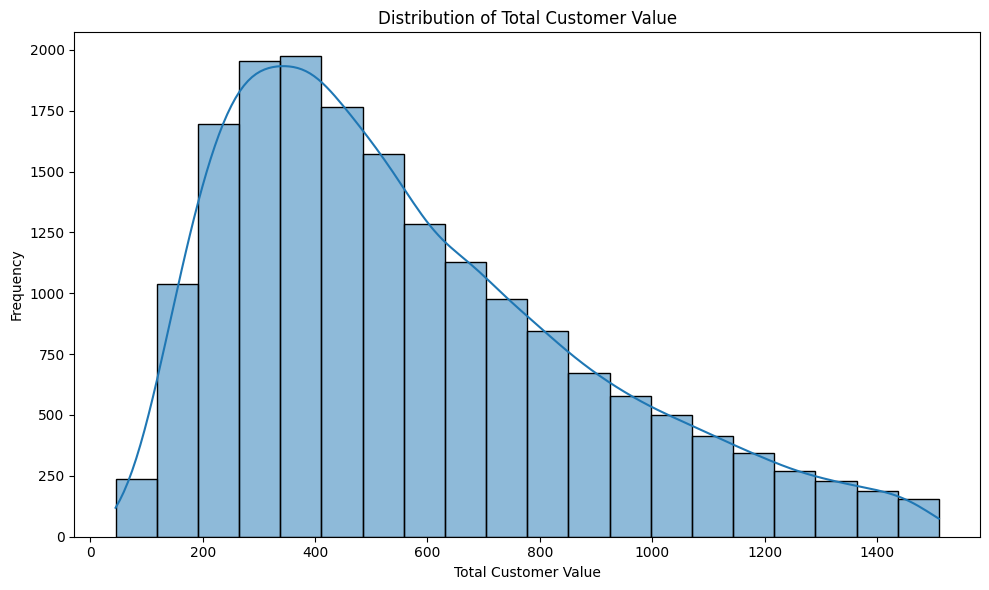

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(data=flo_data, x='customer_value_total', bins=20, kde=True)
plt.xlabel('Total Customer Value')
plt.ylabel('Frequency')
plt.title('Distribution of Total Customer Value')

plt.tight_layout()
save_fig('histplot_total_customer_value.png')

plt.show()

In [55]:
flo_data[['order_num_total', 'customer_value_total']]

,order_num_total,customer_value_total
0,5.0,939.37
2,5.0,585.32
3,2.0,121.97
4,2.0,209.98
5,3.0,200.86
...,...,...
19940,3.0,401.96
19941,2.0,390.47
19942,3.0,632.94
19943,6.0,1009.77


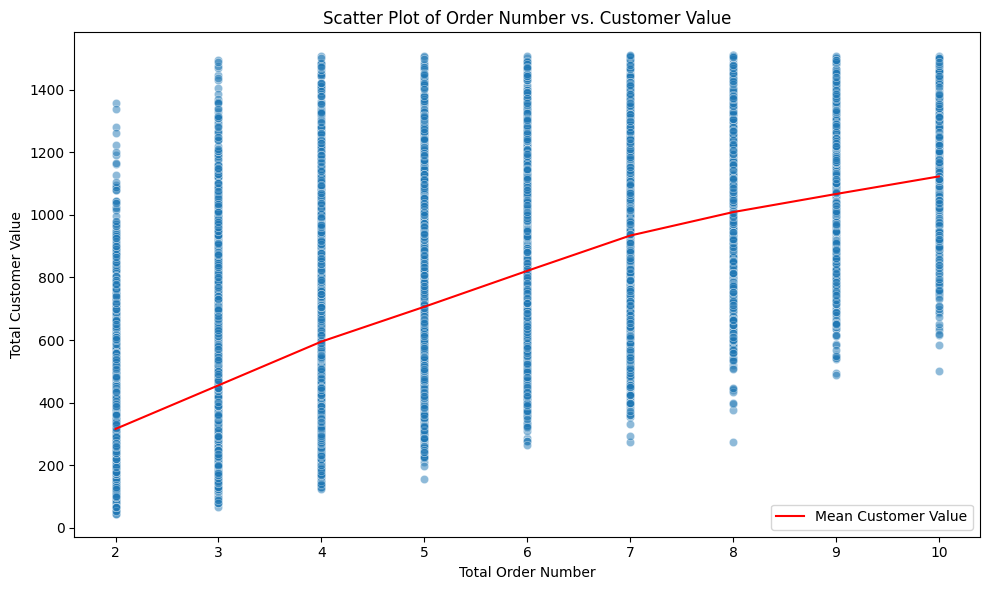

In [56]:
order_value_avg = flo_data.groupby('order_num_total')['customer_value_total'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=flo_data, x='order_num_total', y='customer_value_total', alpha=0.5)
plt.xlabel('Total Order Number')
plt.ylabel('Total Customer Value')
plt.title('Scatter Plot of Order Number vs. Customer Value')

sns.lineplot(data=order_value_avg, x='order_num_total', y='customer_value_total', color='r', ls='-', label='Mean Customer Value')
plt.legend()

plt.tight_layout()
save_fig('scatter_order_vs_value.png')

plt.show()

In [57]:
flo_data['average_order_period'] = (flo_data['last_order_date'] - flo_data['first_order_date']) / flo_data['order_num_total']

In [58]:
flo_data['average_order_period_days'] = flo_data['average_order_period'].dt.days

In [59]:
flo_data['average_order_period_days'].describe()

count    17812.000000
mean       171.662924
std        142.934339
min          0.000000
25%         86.000000
50%        137.000000
75%        213.000000
max       1302.000000
Name: average_order_period_days, dtype: float64

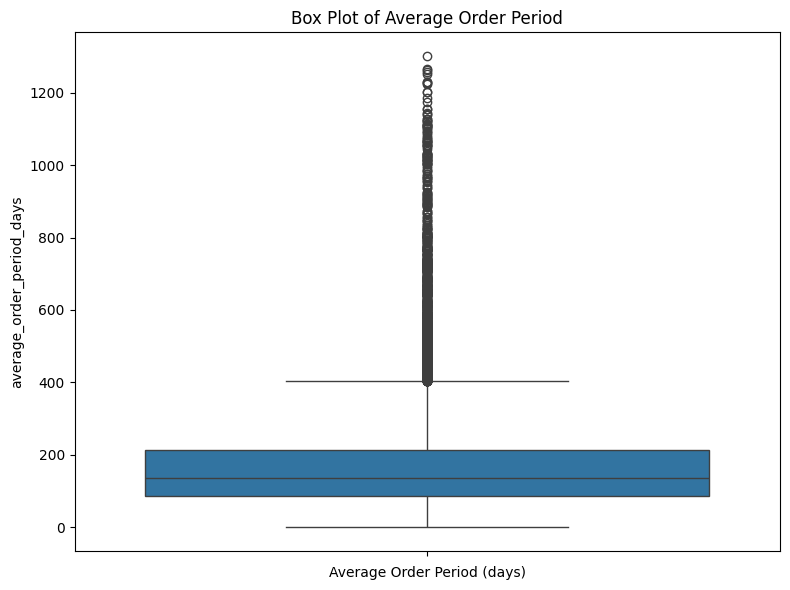

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=flo_data, y='average_order_period_days')
plt.xlabel('Average Order Period (days)')
plt.title('Box Plot of Average Order Period')

plt.tight_layout()
plt.show()

In [61]:
flo_data = remove_outlier(flo_data, 'average_order_period_days')

In [62]:
flo_data['average_order_period_days'].describe()

count    16817.000000
mean       145.813879
std         85.964874
min          0.000000
25%         84.000000
50%        130.000000
75%        195.000000
max        403.000000
Name: average_order_period_days, dtype: float64

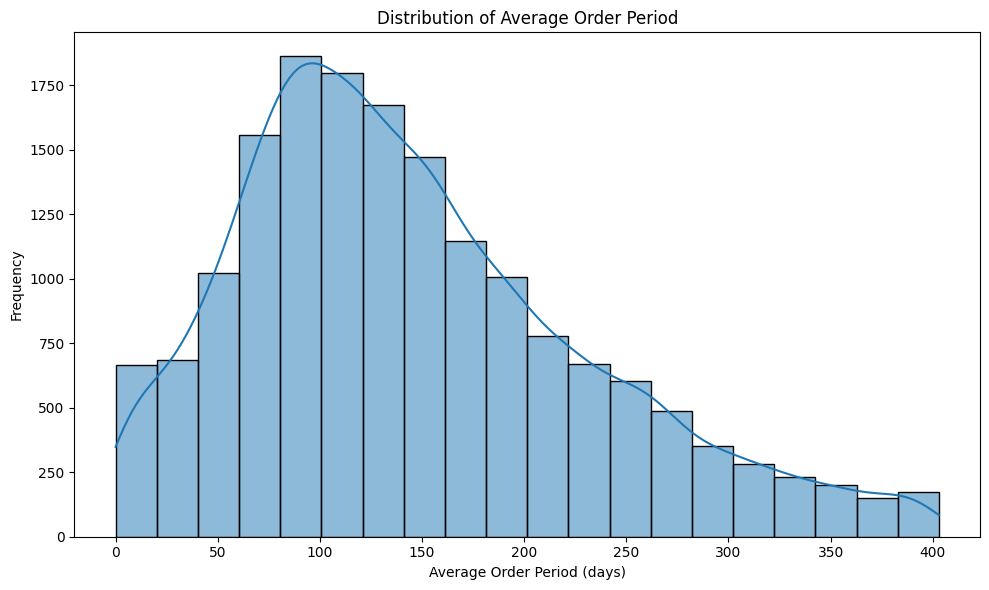

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(data=flo_data, x='average_order_period_days', bins=20, kde=True)
plt.xlabel('Average Order Period (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Order Period')

plt.tight_layout()
plt.show()

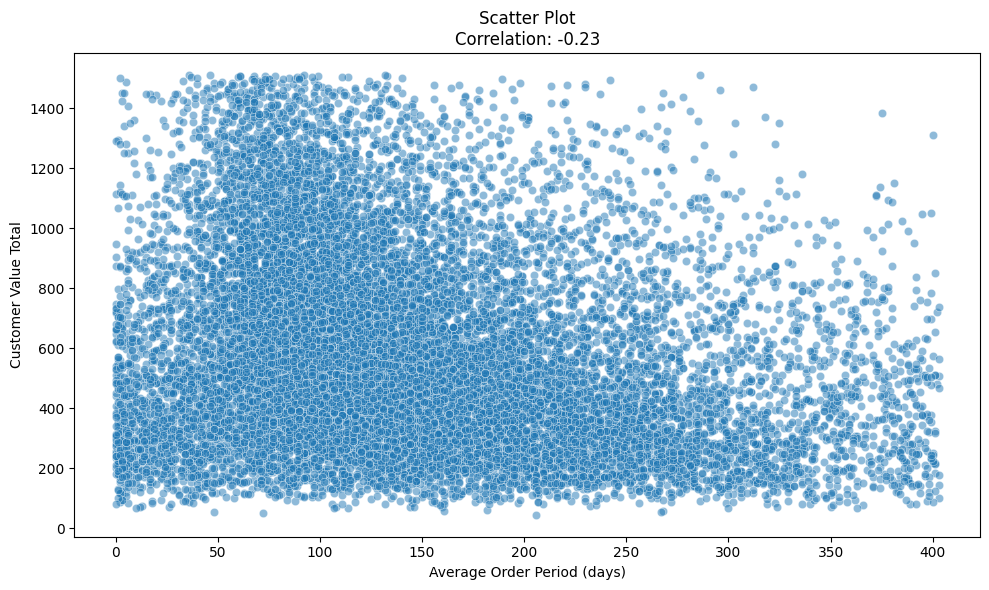

In [64]:
correlation = flo_data['average_order_period_days'].corr(flo_data['customer_value_total'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=flo_data, x='average_order_period_days', y='customer_value_total', alpha=0.5)
plt.xlabel('Average Order Period (days)')
plt.ylabel('Customer Value Total')
plt.title(f'Scatter Plot\nCorrelation: {correlation:.2f}')

plt.tight_layout()
save_fig('scatter_order_period_vs_value.png')

plt.show()

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
bins = 20

flo_data['order_period_category'] = pd.cut(flo_data['average_order_period_days'], bins=bins)

for group in sorted(flo_data['order_period_category'].unique()):
    print(group)

(-0.403, 20.15]
(20.15, 40.3]
(40.3, 60.45]
(60.45, 80.6]
(80.6, 100.75]
(100.75, 120.9]
(120.9, 141.05]
(141.05, 161.2]
(161.2, 181.35]
(181.35, 201.5]
(201.5, 221.65]
(221.65, 241.8]
(241.8, 261.95]
(261.95, 282.1]
(282.1, 302.25]
(302.25, 322.4]
(322.4, 342.55]
(342.55, 362.7]
(362.7, 382.85]
(382.85, 403.0]


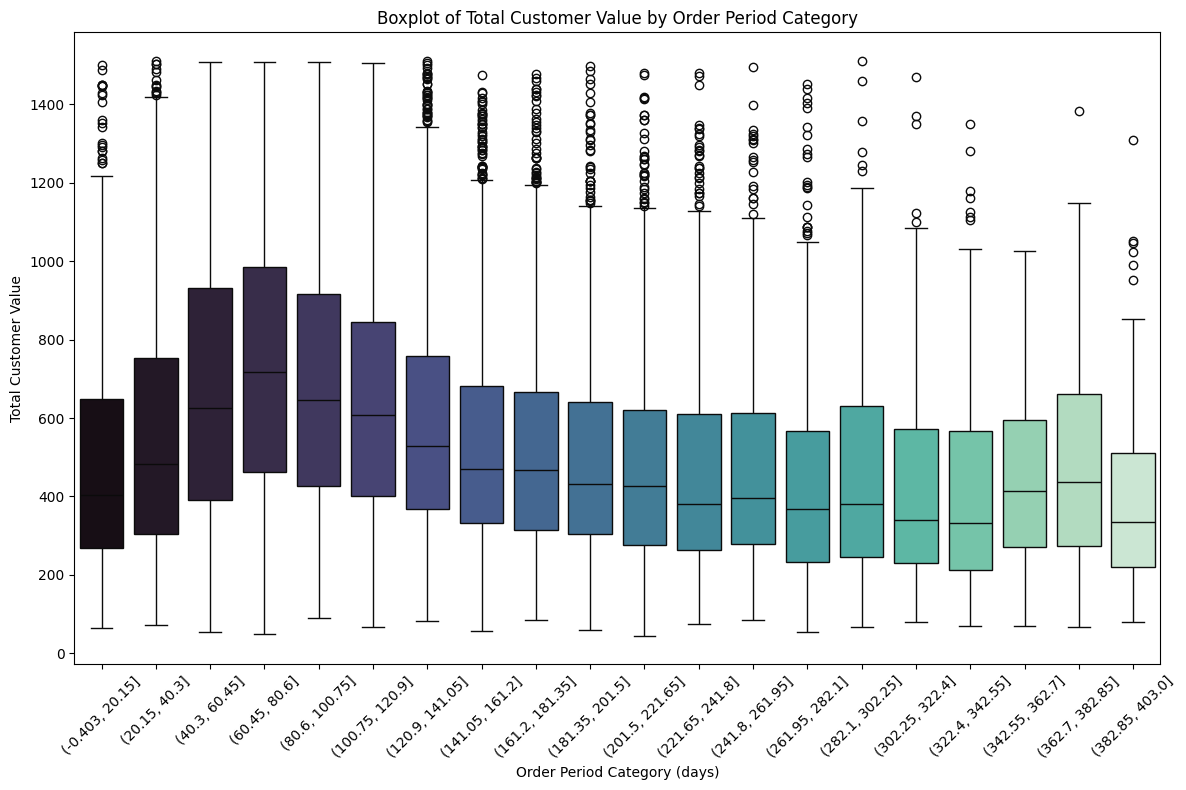

In [67]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=flo_data, x='order_period_category', y='customer_value_total', palette='mako')
plt.xlabel('Order Period Category (days)')
plt.xticks(rotation=45)
plt.ylabel('Total Customer Value')
plt.title('Boxplot of Total Customer Value by Order Period Category')

plt.tight_layout()
save_fig('boxplot_value_by_order_period_category.png')

plt.show()

In [68]:
groups = sorted(flo_data['order_period_category'].unique())

top_group = groups[3]
target_group = groups[4:7]

print(top_group)
print(target_group)

(60.45, 80.6]
[Interval(80.6, 100.75, closed='right'), Interval(100.75, 120.9, closed='right'), Interval(120.9, 141.05, closed='right')]


In [69]:
top_group_df = flo_data[flo_data['order_period_category'] == top_group]
target_group_df = flo_data[flo_data['order_period_category'].isin(target_group)]

In [70]:
def get_rate(df, column, num=False):
    total = len(df)
    if num:
        return df[column].value_counts()[:num] / total
    return df[column].value_counts() / total

In [71]:
# group - channel

top_group_channel_distribution = get_rate(top_group_df, 'last_order_channel')
target_group_channel_distribution = get_rate(target_group_df, 'last_order_channel')

In [72]:
target_group_channel_distribution

last_order_channel
Android App    0.385596
Offline        0.293511
Mobile         0.158290
Ios App        0.087209
Desktop        0.075394
Name: count, dtype: float64

In [73]:
combined_data = pd.DataFrame({'Top Group': top_group_channel_distribution, 'Target Group': target_group_channel_distribution})
combined_data = combined_data.reset_index().rename(columns={'last_order_channel':'Channel'}).fillna(0)

combined_data

,Channel,Top Group,Target Group
0,Android App,0.391276,0.385596
1,Offline,0.320718,0.293511
2,Mobile,0.119949,0.158290
3,Ios App,0.101988,0.087209
4,Desktop,0.066068,0.075394


In [74]:
combined_data.melt(id_vars='Channel')

,Channel,variable,value
0,Android App,Top Group,0.391276
1,Offline,Top Group,0.320718
2,Mobile,Top Group,0.119949
3,Ios App,Top Group,0.101988
4,Desktop,Top Group,0.066068
5,Android App,Target Group,0.385596
6,Offline,Target Group,0.293511
7,Mobile,Target Group,0.158290
8,Ios App,Target Group,0.087209
9,Desktop,Target Group,0.075394


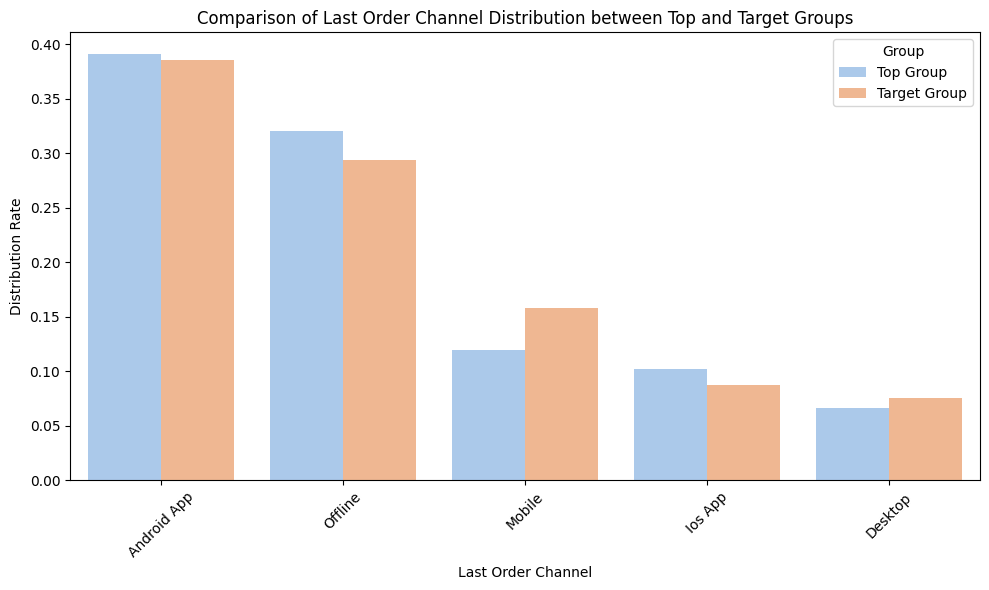

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_data.melt(id_vars='Channel'), x='Channel', y='value', hue='variable', palette='pastel')
plt.xlabel('Last Order Channel')
plt.ylabel('Distribution Rate')
plt.title('Comparison of Last Order Channel Distribution between Top and Target Groups')
plt.xticks(rotation=45)
plt.legend(title='Group')

plt.tight_layout()
save_fig('barplot_channel_distribution_top_vs_target.png')

plt.show()

In [76]:
top_group_category_distribution = get_rate(top_group_df, 'interested_in_categories_12_eng', 10)
target_group_category_distribution = get_rate(target_group_df, 'interested_in_categories_12_eng', 10)

In [77]:
combined_data = pd.DataFrame({'Top Group': top_group_category_distribution, 'Target Group': target_group_category_distribution})
combined_data = combined_data.reset_index().rename(columns={'interested_in_categories_12_eng':'Category'}).fillna(0)

combined_data

,Category,Top Group,Target Group
0,[ACTIVE CHILD],0.026299,0.035446
1,[ACTIVE SPORTS],0.134060,0.181733
2,"[CHILD, WOMAN, ACTIVE SPORTS]",0.022450,0.000000
3,[CHILD],0.032713,0.046324
4,"[MAN, ACTIVE SPORTS]",0.087235,0.066204
5,"[MAN, WOMAN, ACTIVE SPORTS]",0.075690,0.035259
6,"[MAN, WOMAN]",0.055164,0.048012
7,[MAN],0.094291,0.102213
8,"[WOMAN, ACTIVE SPORTS]",0.093008,0.072581
9,[WOMAN],0.093008,0.102588


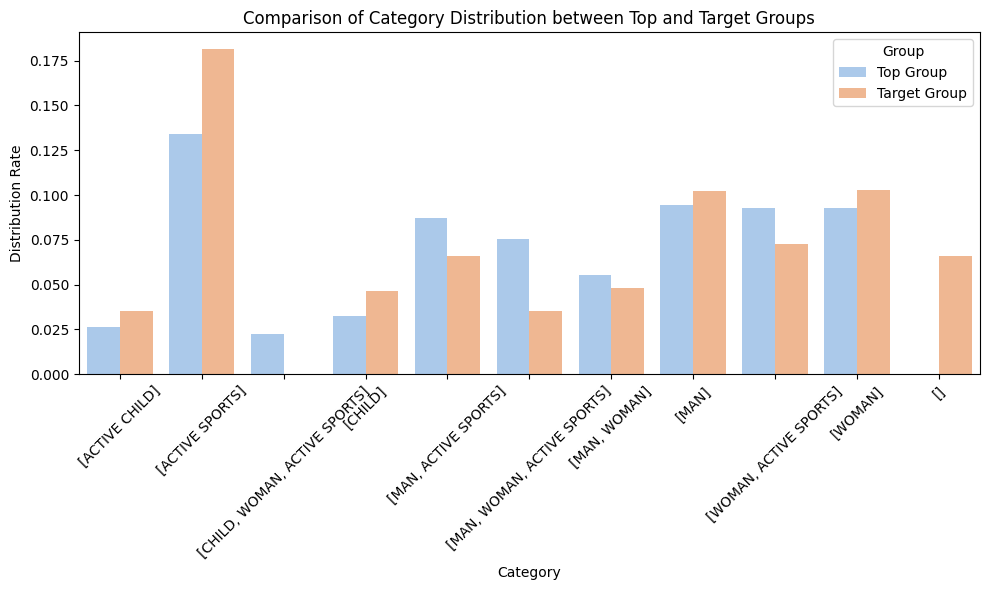

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_data.melt(id_vars='Category'), x='Category', y='value', hue='variable', palette='pastel')
plt.xlabel('Category')
plt.ylabel('Distribution Rate')
plt.title('Comparison of Category Distribution between Top and Target Groups')
plt.xticks(rotation=45)
plt.legend(title='Group')

plt.tight_layout()
save_fig('barplot_category_distribution_top_vs_target.png')

plt.show()

In [79]:
top_group_order_num_online_distribution = get_rate(top_group_df, 'order_num_total_ever_online', 10)
target_group_order_num_online_distribution = get_rate(target_group_df, 'order_num_total_ever_online', 10)

top_group_order_num_offline_distribution = get_rate(top_group_df, 'order_num_total_ever_offline', 10)
target_group_order_num_offline_distribution = get_rate(target_group_df, 'order_num_total_ever_offline', 10)

In [80]:
combined_data_online = pd.DataFrame({'Top Group': top_group_order_num_online_distribution, 'Target Group': target_group_order_num_online_distribution})
combined_data_online = combined_data_online.reset_index().rename(columns={'order_num_total_ever_online':'Order Num Online'}).fillna(0)

combined_data_offline = pd.DataFrame({'Top Group': top_group_order_num_offline_distribution, 'Target Group': target_group_order_num_offline_distribution})
combined_data_offline = combined_data_offline.reset_index().rename(columns={'order_num_total_ever_offline':'Order Num Offline'}).fillna(0)


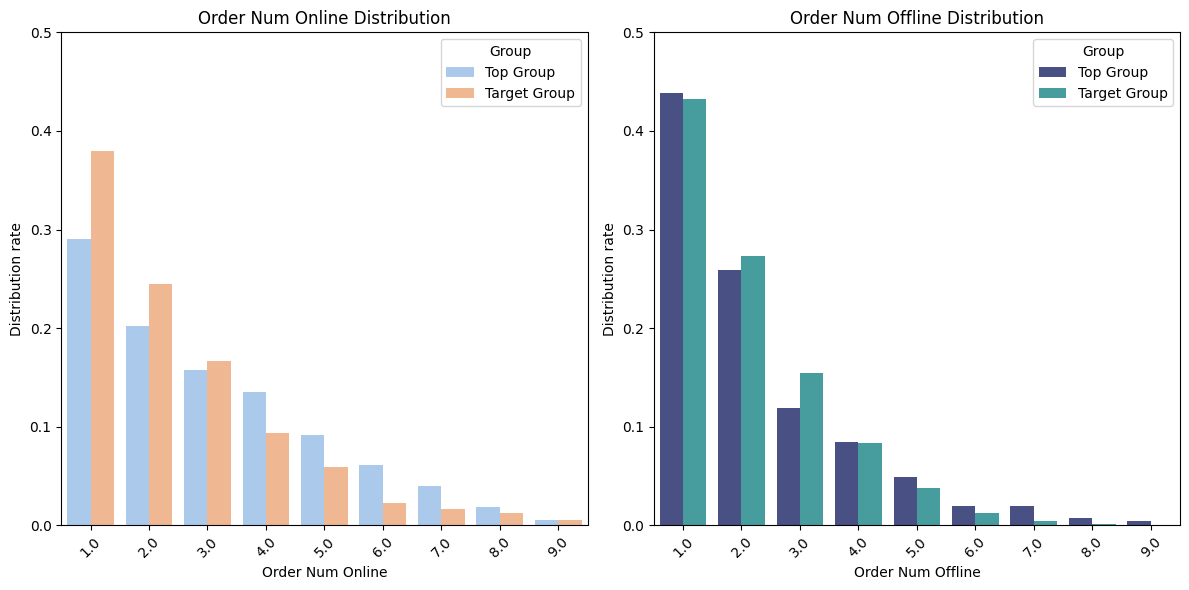

In [81]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.barplot(data=combined_data_online.melt(id_vars='Order Num Online'), x='Order Num Online', y='value', hue='variable', palette='pastel')
plt.xlabel('Order Num Online')
plt.ylabel('Distribution rate')
plt.ylim(0, 0.5)
plt.title('Order Num Online Distribution')
plt.xticks(rotation=45)
plt.legend(title='Group')

plt.subplot(1,2,2)
sns.barplot(data=combined_data_offline.melt(id_vars='Order Num Offline'), x='Order Num Offline', y='value', hue='variable', palette='mako')
plt.xlabel('Order Num Offline')
plt.ylabel('Distribution rate')
plt.ylim(0, 0.5)
plt.title('Order Num Offline Distribution')
plt.xticks(rotation=45)
plt.legend(title='Group')

plt.tight_layout()
save_fig('barplot_order_num_online_offline_distribution.png')

plt.show()

## RFM

In [82]:
flo_rfm = flo_data.copy(deep=True)

# Recency   마지막 구매날짜로부터 지금까지 걸린 시간
# Frequency 특정 기간 구매 횟수
# Monetary  특정 기간 구매 금액

target_date = flo_data['last_order_date'].max()

flo_rfm['Recency'] = target_date - flo_rfm['last_order_date']
flo_rfm['Recency'] = flo_rfm['Recency'].dt.days
flo_rfm['Frequency'] = flo_rfm['order_num_total']
flo_rfm['Monetary'] = flo_rfm['customer_value_total']

flo_rfm = flo_rfm[['master_id', 'Recency', 'Frequency', 'Monetary']]
flo_rfm.head()

,master_id,Recency,Frequency,Monetary
0,cc294636-19f0-11eb-8d74-000d3a38a36f,93,5.0,939.37
2,69b69676-1a40-11ea-941b-000d3a38a36f,184,5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,133,2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,84,2.0,209.98
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,78,3.0,200.86


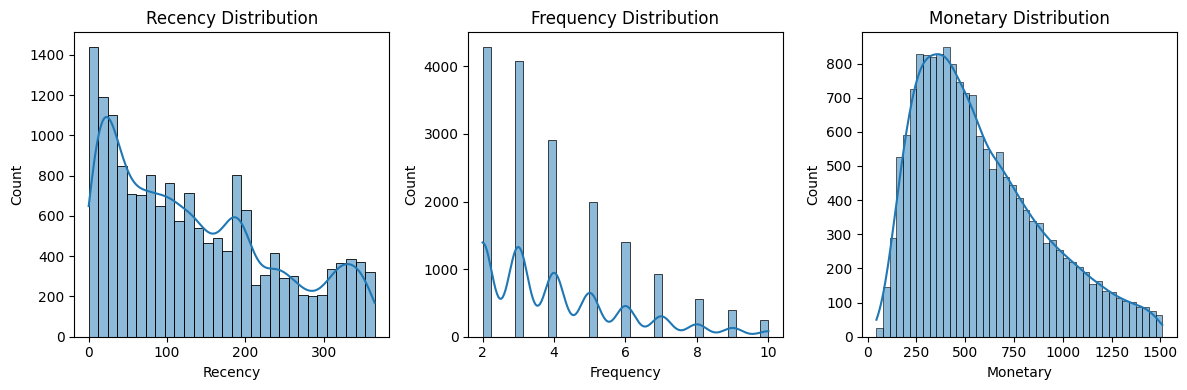

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.histplot(data=flo_rfm, x='Recency', kde=True)
plt.title('Recency Distribution')

plt.subplot(132)
sns.histplot(data=flo_rfm, x='Frequency', kde=True)
plt.title('Frequency Distribution')

plt.subplot(133)
sns.histplot(data=flo_rfm, x='Monetary', kde=True)
plt.title('Monetary Distribution')

plt.tight_layout()
save_fig('rfm_distribution_hist.png')

plt.show()

In [84]:
# Recency: lower, higher score
flo_rfm['R'] = pd.qcut(flo_rfm['Recency'], q=5, labels=[5, 4, 3, 2, 1], duplicates='drop')

# Frequency, Moneatary: higher, higher score
flo_rfm['F'] = pd.qcut(flo_rfm['Frequency'], q=5, labels=[1, 2, 3, 4], duplicates='drop')
flo_rfm['M'] = pd.qcut(flo_rfm['Monetary'], q=5, labels=[1, 2, 3, 4, 5], duplicates='drop')

In [85]:
flo_rfm['RFM Cell'] = flo_rfm['R'].astype(str) + flo_rfm['F'].astype(str) + flo_rfm['M'].astype(str)
flo_rfm.head()

,master_id,Recency,Frequency,Monetary,R,F,M,RFM Cell
0,cc294636-19f0-11eb-8d74-000d3a38a36f,93,5.0,939.37,3,3,5,335
2,69b69676-1a40-11ea-941b-000d3a38a36f,184,5.0,585.32,2,3,3,233
3,1854e56c-491f-11eb-806e-000d3a38a36f,133,2.0,121.97,3,1,1,311
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,84,2.0,209.98,4,1,1,411
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,78,3.0,200.86,4,1,1,411


In [86]:
rf_matrix = flo_rfm.groupby(['R', 'F']).agg({
    'master_id': 'count',
    'Monetary': 'sum'}).reset_index()

rf_matrix['Average Monetary'] = rf_matrix['Monetary'] / rf_matrix['master_id']

In [87]:
rf_matrix

,R,F,master_id,Monetary,Average Monetary
0,5,1,1526,627030.01,410.897779
1,5,2,593,378046.93,637.515902
2,5,3,730,573820.22,786.055096
3,5,4,515,534186.68,1037.255689
4,4,1,1518,617876.80,407.033465
5,4,2,608,358879.15,590.261760
6,4,3,768,601491.62,783.192214
7,4,4,530,542180.16,1022.981434
8,3,1,1671,628933.69,376.381622
9,3,2,582,342492.77,588.475550


In [88]:
rf_pivot = rf_matrix.pivot(index='F', columns='R', values='master_id').\
            fillna(0).\
            sort_index(ascending=False)

rf_pivot

R,5,4,3,2,1
F,,,,,
4,515,530,405,357,336
3,730,768,653,655,583
2,593,608,582,576,551
1,1526,1518,1671,1783,1877


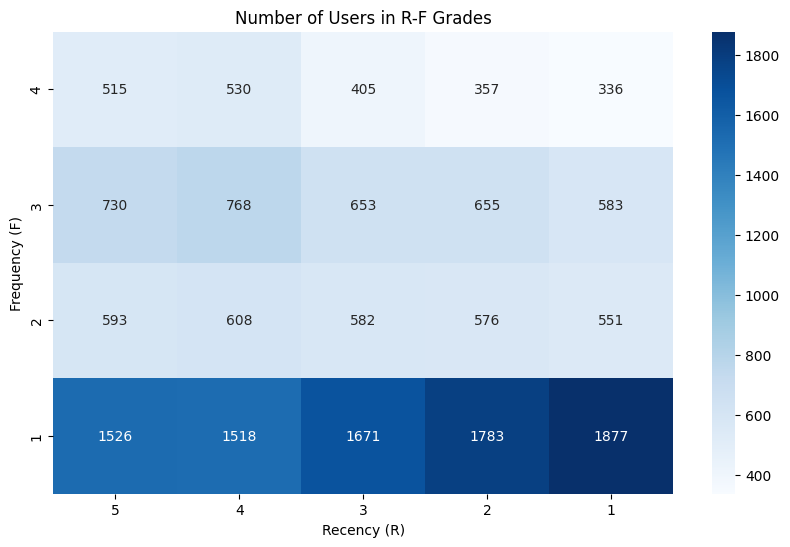

In [89]:
plt.figure(figsize=(10, 6))
sns.heatmap(rf_pivot, annot=True, fmt='d', cmap='Blues')
plt.title('Number of Users in R-F Grades')
plt.xlabel('Recency (R)')
plt.ylabel('Frequency (F)')
save_fig('rf_heatmap_user_count.png')

plt.show()

In [90]:
rf_pivot = rf_matrix.pivot(index='F', columns='R', values='Average Monetary').\
            fillna(0).\
            sort_index(ascending=False)

rf_pivot

R,5,4,3,2,1
F,,,,,
4,1037.255689,1022.981434,970.424395,1008.503277,938.467798
3,786.055096,783.192214,746.867090,743.481374,714.165609
2,637.515902,590.261760,588.475550,600.086302,585.064991
1,410.897779,407.033465,376.381622,385.807044,361.804305


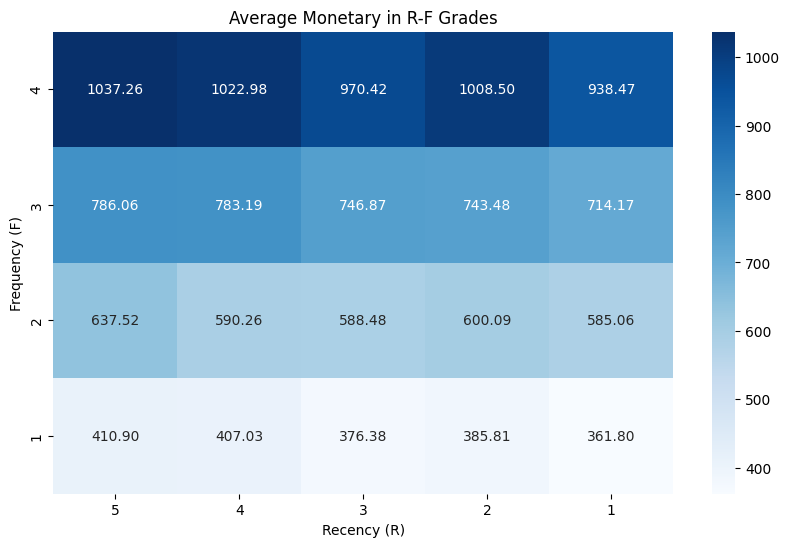

In [91]:
plt.figure(figsize=(10, 6))
sns.heatmap(rf_pivot, annot=True, fmt='.2f', cmap='Blues')
plt.title('Average Monetary in R-F Grades')
plt.xlabel('Recency (R)')
plt.ylabel('Frequency (F)')
save_fig('rf_heatmap_avg_monetary.png')

plt.show()

## CLTV

### Metric

In [92]:
flo_cltv = flo_data.copy(deep=True)

event_start = '2020-01-01'
event_end = '2020-12-31'

flo_cltv = flo_cltv[(flo_cltv['first_order_date'] >= event_start) & (flo_cltv['last_order_date'] <= event_end)].reset_index(drop=True)

In [93]:
total = len(flo_cltv)

total, round(total/len(flo_data)*100, 2)

(1510, 8.98)

In [94]:
# 1) APV, Average Purchase Value

flo_cltv['PV'] = flo_cltv['customer_value_total'] / flo_cltv['order_num_total']

average_pv = sum(flo_cltv['PV']) / total
print('Average Purchase Value:', average_pv)

Average Purchase Value: 155.4997803663399


In [95]:
# 2) APFR, Average Purchae Frequency Rate

flo_cltv['frequency'] = flo_cltv['order_num_total']

average_pfr = sum(flo_cltv['frequency']) / total
print('Average Purchase Frequency Rate:', average_pfr)

Average Purchase Frequency Rate: 2.862913907284768


In [96]:
# 3) ACV, Average Customer Value

flo_cltv['CV'] = flo_cltv['PV'] * average_pfr

average_cv = sum(flo_cltv['CV']) / total
print('Average Customer Value:', average_cv)

Average Customer Value: 445.1824837905242


In [97]:
# 4) CL, Customer Lifespan

flo_cltv['CL'] = (flo_cltv['last_order_date'] - flo_cltv['first_order_date']).dt.days

average_cl = sum(flo_cltv['CL']) / total
print('Average Customer Lifespan:', average_cl)

Average Customer Lifespan: 161.32317880794702


In [98]:
# 5) CLTV, Customer Lifetime Value

flo_cltv['CLTV'] = flo_cltv['CV'] * flo_cltv['CL']

average_cltv = sum(flo_cltv['CLTV']) / total
print('Average Customer Lifetime Value:', average_cltv)

Average Customer Lifetime Value: 70575.6641552041


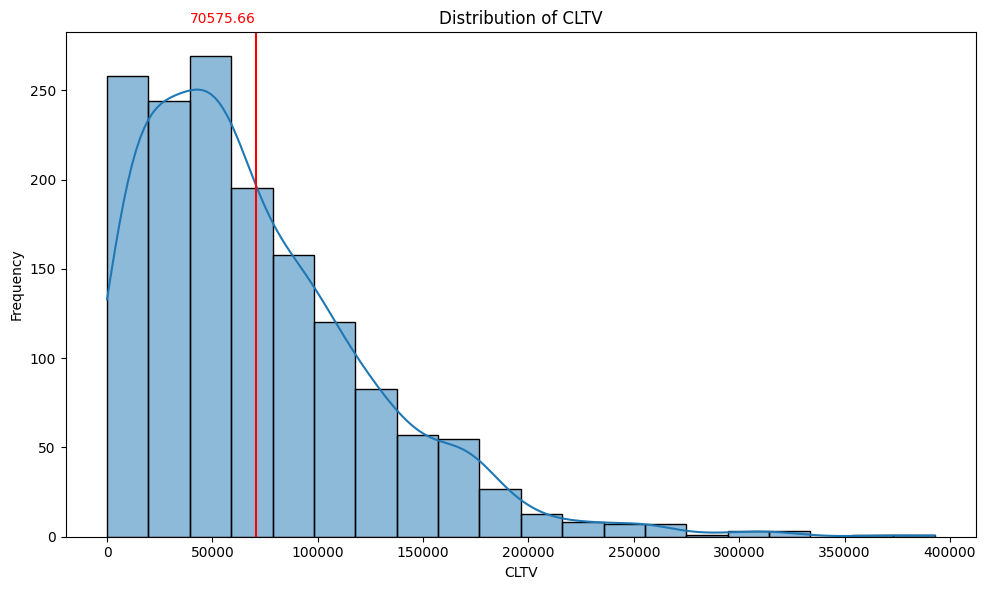

In [99]:
plt.figure(figsize=(10, 6))
sns.histplot(data=flo_cltv, x='CLTV', bins=20, kde=True)
plt.xlabel('CLTV')
plt.ylabel('Frequency')

plt.axvline(average_cltv, color='red', ls='-', label='Average Customer Lifetime Value')
plt.title('Distribution of CLTV')

plt.text(average_cltv, 290, f'{average_cltv:.2f}', color='red', va='center', ha='right')

plt.tight_layout()
save_fig('cltv_distribution.png')

plt.show()

In [100]:
flo_cltv['segment'] = pd.qcut(flo_cltv['CLTV'], 5, labels=["E", "D", "C", "B", "A"])
flo_cltv.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,...,last_order_day_online,average_order_period,average_order_period_days,order_period_category,PV,frequency,CV,CL,CLTV,segment
0,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.0,1.0,59.99,...,Sunday,57 days 00:00:00,57,"(40.3, 60.45]",93.982500,4.0,269.063806,228,61346.547834,C
1,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.0,1.0,49.99,...,Friday,44 days 12:00:00,44,"(40.3, 60.45]",81.815000,2.0,234.229301,89,20846.407818,E
2,ae608ece-c9d8-11ea-a31e-000d3a38a36f,Ios App,Offline,2020-07-19,2020-07-25,2020-07-19,2020-07-25,1.0,1.0,74.99,...,Sunday,3 days 00:00:00,3,"(-0.403, 20.15]",57.490000,2.0,164.588921,6,987.533523,E
3,7a52fd46-5be8-11ea-a7c9-000d3a38a36f,Mobile,Mobile,2020-02-16,2020-07-10,2020-07-10,2020-02-16,1.0,1.0,45.49,...,Friday,72 days 12:00:00,72,"(60.45, 80.6]",67.740000,2.0,193.933788,145,28120.399272,D
4,c109302c-f72c-11ea-a533-000d3a38a36f,Ios App,Offline,2020-09-15,2020-12-15,2020-09-15,2020-12-15,2.0,1.0,649.99,...,Tuesday,30 days 08:00:00,30,"(20.15, 40.3]",482.663333,3.0,1381.823570,91,125745.944828,A


In [101]:
# if error occur

data = np.log10(flo_cltv['CLTV'])
data = [(idx, num) for idx, num in enumerate(data) if num != -np.inf]

x = [num for _, num in data]
idx = [idx for idx, _ in data]

In [102]:
print(len(x))

1501


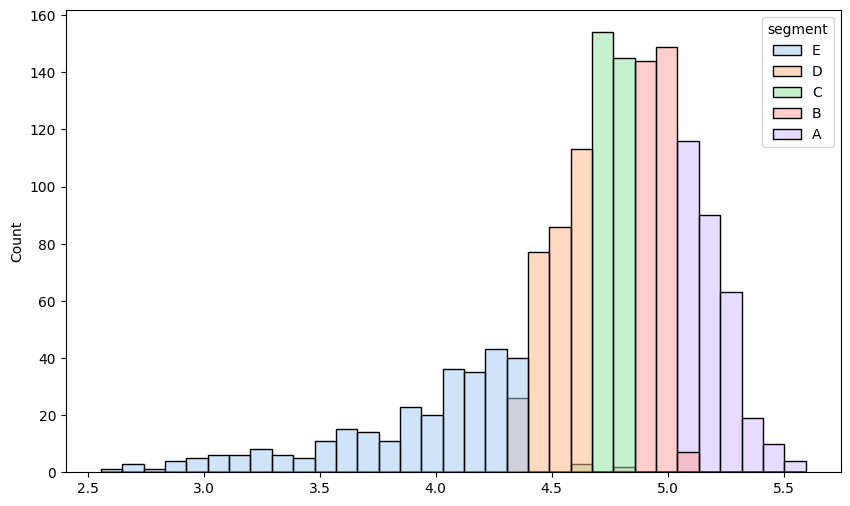

In [103]:
import numpy as np

plt.figure(figsize=(10, 6))
sns.histplot(x=x, hue = flo_cltv.iloc[idx]['segment'], palette='pastel')
save_fig('cltv_hist_segmented.png')

plt.show()

In [104]:
flo_cltv.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date',
       'last_order_date', 'last_order_date_online', 'last_order_date_offline',
       'order_num_total_ever_online', 'order_num_total_ever_offline',
       'customer_value_total_ever_offline', 'customer_value_total_ever_online',
       'interested_in_categories_12', 'order_num_total',
       'customer_value_total', 'interested_in_categories_12_eng',
       'last_order_day_offline', 'last_order_day_online',
       'average_order_period', 'average_order_period_days',
       'order_period_category', 'PV', 'frequency', 'CV', 'CL', 'CLTV',
       'segment'],
      dtype='object')

In [105]:
features = ['PV', 'frequency', 'CV', 'CL', 'CLTV']

flo_cluster = flo_cltv.copy()

flo_cluster = flo_cluster[features]
flo_cluster.head()

,PV,frequency,CV,CL,CLTV
0,93.982500,4.0,269.063806,228,61346.547834
1,81.815000,2.0,234.229301,89,20846.407818
2,57.490000,2.0,164.588921,6,987.533523
3,67.740000,2.0,193.933788,145,28120.399272
4,482.663333,3.0,1381.823570,91,125745.944828


In [106]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# scaling
scaler = StandardScaler()
flo_cluster_scaled = scaler.fit_transform(flo_cluster)

# fit
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(flo_cluster_scaled)

flo_cluster['Cluster'] = kmeans.labels_

In [107]:
from collections import Counter

test_lst = [2,2,3,3,2,3,4,2,3,2,3,4,2,3,4,3,3,5,6,7,6,5,5,6,]
Counter(test_lst)

Counter({2: 6, 3: 8, 4: 3, 5: 3, 6: 3, 7: 1})

In [108]:
from collections import Counter

Counter(kmeans.labels_)

Counter({0: 196, 3: 503, 1: 177, 4: 412, 2: 222})

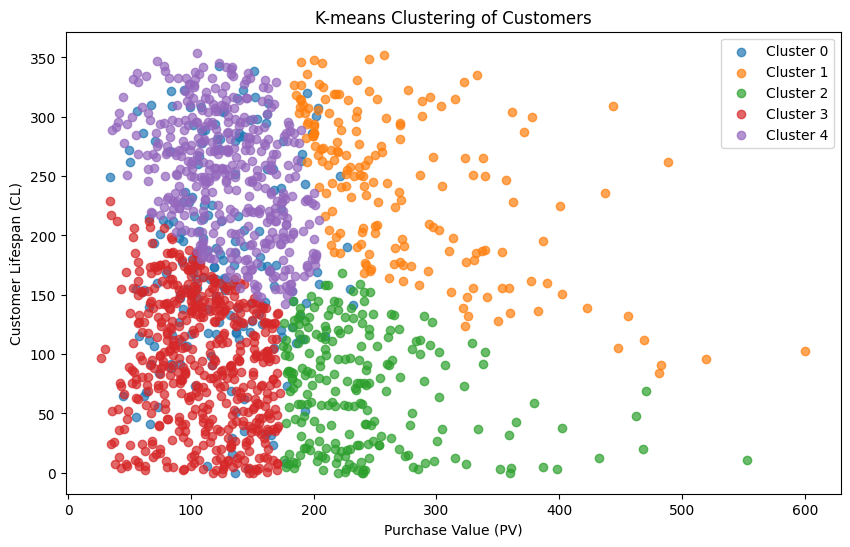

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for cluster_label in range(5):
    cluster_data = flo_cluster[flo_cluster['Cluster'] == cluster_label]
    plt.scatter(cluster_data['PV'], cluster_data['CL'], label=f'Cluster {cluster_label}', alpha=0.7)

plt.xlabel('Purchase Value (PV)')
plt.ylabel('Customer Lifespan (CL)')
plt.title('K-means Clustering of Customers')
plt.legend()
save_fig('kmeans_pv_cl_scatter.png')

plt.show()

In [110]:
cluster_one = flo_cluster[flo_cluster['Cluster'] == 1]
cluster_one

,PV,frequency,CV,CL,CLTV,Cluster
4,482.663333,3.0,1381.823570,91,125745.944828,1
7,222.656667,3.0,637.446868,241,153624.695079,1
19,285.796667,3.0,818.211252,158,129277.377762,1
40,251.977500,4.0,721.389889,209,150770.486816,1
42,184.355000,2.0,527.792493,327,172588.145334,1
...,...,...,...,...,...,...
1488,302.225000,2.0,865.244156,205,177375.051904,1
1495,359.545000,2.0,1029.346381,135,138961.761407,1
1496,242.245000,4.0,693.526579,175,121367.151407,1
1497,325.323333,3.0,931.372695,132,122941.195788,1


In [111]:
flo_cltv.iloc[cluster_one.index]['segment'].value_counts()

segment
A    177
E      0
D      0
C      0
B      0
Name: count, dtype: int64

### Top 10

In [112]:
columns = ['master_id', 'order_channel', 'interested_in_categories_12_eng', 'customer_value_total', 'PV', 'frequency', 'CV', 'CL', 'CLTV',
       'segment']


flo_cltv_top10 = flo_cltv.sort_values(by='CLTV', ascending=False)[columns].head(10).reset_index(drop=True)
flo_cltv_top10

,master_id,order_channel,interested_in_categories_12_eng,customer_value_total,PV,frequency,CV,CL,CLTV,segment
0,9e1c69b6-5bec-11ea-8865-000d3a38a36f,Ios App,[ACTIVE SPORTS],887.98,443.990000,2.0,1271.105146,309,392771.490020,A
1,149bd118-5fcf-11ea-8dd8-000d3a38a36f,Mobile,[WOMAN],977.99,488.995000,2.0,1399.950586,262,366787.053556,A
2,13baebb4-5bd6-11ea-ab15-000d3a38a36f,Mobile,[ACTIVE SPORTS],754.97,377.485000,2.0,1080.707056,300,324212.116887,A
3,f9434dc0-5bf4-11ea-8df6-000d3a38a36f,Android App,"[WOMAN, ACTIVE SPORTS]",998.90,332.966667,3.0,953.254901,335,319340.391722,A
4,6c3cda14-6184-11ea-8dd8-000d3a38a36f,Mobile,"[WOMAN, ACTIVE SPORTS]",722.79,361.395000,2.0,1034.642772,304,314531.402543,A
5,15872818-5fd7-11ea-8dd8-000d3a38a36f,Mobile,"[WOMAN, ACTIVE SPORTS]",1486.29,371.572500,4.0,1063.780078,287,305304.882333,A
6,d82156f0-5b22-11ea-ae74-000d3a38a36f,Android App,"[MAN, CHILD, WOMAN, ACTIVE SPORTS]",967.15,322.383333,3.0,922.955728,329,303652.434669,A
7,86314d0e-6f7d-11ea-b40c-000d3a38a36f,Ios App,[ACTIVE SPORTS],1311.95,437.316667,3.0,1251.999967,236,295471.992185,A
8,65e0481a-5bb0-11ea-b719-000d3a38a36f,Mobile,"[MAN, CHILD]",1259.34,314.835000,4.0,901.345500,315,283923.832500,A
9,0a6933d8-b0a8-11e9-9757-000d3a38a36f,Android App,[ACTIVE SPORTS],606.95,303.475000,2.0,868.822798,309,268466.244586,A


In [113]:
# order channel 
print(flo_cltv_top10['order_channel'].value_counts(), '\n')

# category
print(flo_cltv_top10['interested_in_categories_12_eng'].value_counts(), '\n')

order_channel
Mobile         5
Android App    3
Ios App        2
Name: count, dtype: int64 

interested_in_categories_12_eng
[ACTIVE SPORTS]                       4
[WOMAN, ACTIVE SPORTS]                3
[WOMAN]                               1
[MAN, CHILD, WOMAN, ACTIVE SPORTS]    1
[MAN, CHILD]                          1
Name: count, dtype: int64 



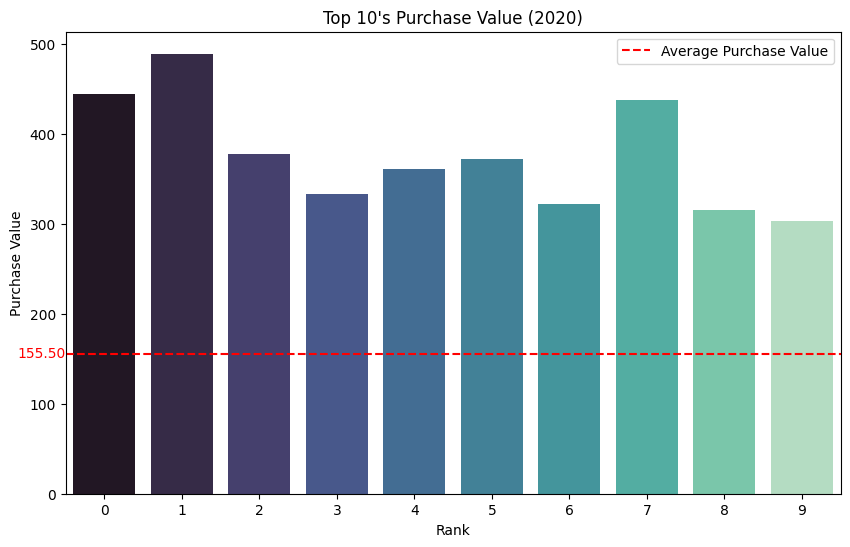

In [114]:
# PV

plt.figure(figsize=(10, 6))

sns.barplot(data=flo_cltv_top10, x=flo_cltv_top10.index, y='PV', palette='mako')
plt.xlabel('Rank')
# plt.xticks([i for i in range(10)], [i for i in range(1,11)])
plt.ylabel('Purchase Value')
plt.axhline(average_pv, color='red', ls='--', label='Average Purchase Value')
plt.title("Top 10's Purchase Value (2020)")

plt.text(-0.5, average_pv, f'{average_pv:.2f}', color='red', va='center', ha='right')

plt.legend()
save_fig('barplot_top10_pv.png')

plt.show()

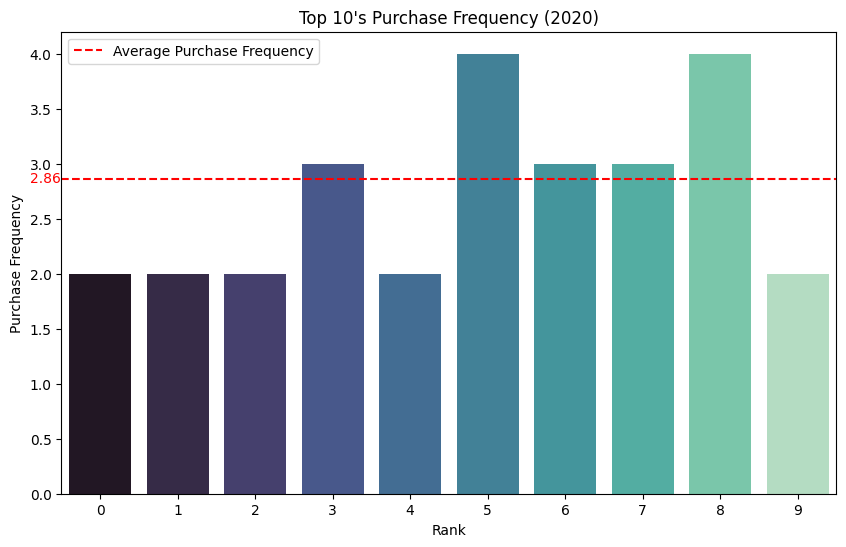

In [115]:
# PF

plt.figure(figsize=(10, 6))

sns.barplot(data=flo_cltv_top10, x=flo_cltv_top10.index, y='frequency', palette='mako')
plt.xlabel('Rank')
plt.ylabel('Purchase Frequency')
plt.axhline(average_pfr, color='red', ls='--', label='Average Purchase Frequency')
plt.title("Top 10's Purchase Frequency (2020)")

plt.text(-0.5, average_pfr, f'{average_pfr:.2f}', color='red', va='center', ha='right')

plt.legend()
save_fig('barplot_top10_pf.png')

plt.show()

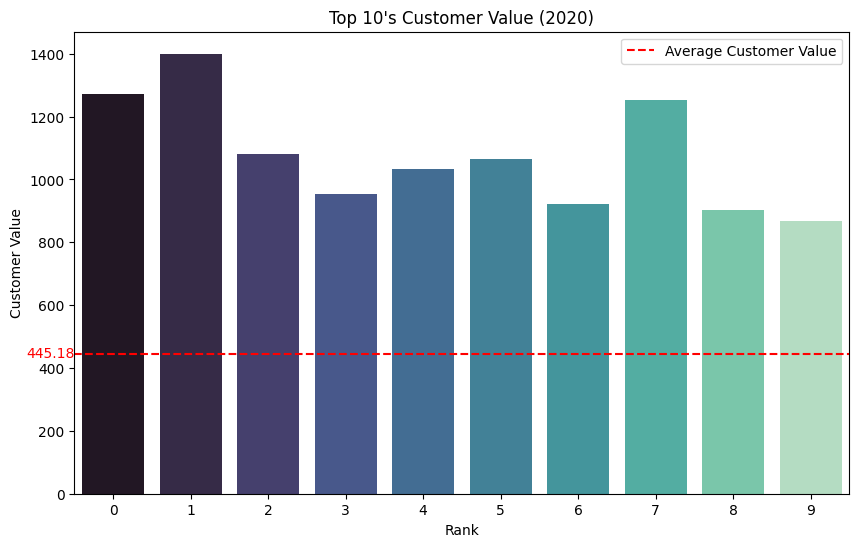

In [116]:
# CV

plt.figure(figsize=(10, 6))

sns.barplot(data=flo_cltv_top10, x=flo_cltv_top10.index, y='CV', palette='mako')
plt.xlabel('Rank')
plt.ylabel('Customer Value')
plt.axhline(average_cv, color='red', ls='--', label='Average Customer Value')
plt.title("Top 10's Customer Value (2020)")

plt.text(-0.5, average_cv, f'{average_cv:.2f}', color='red', va='center', ha='right')

plt.legend()
save_fig('barplot_top10_cv.png')

plt.show()

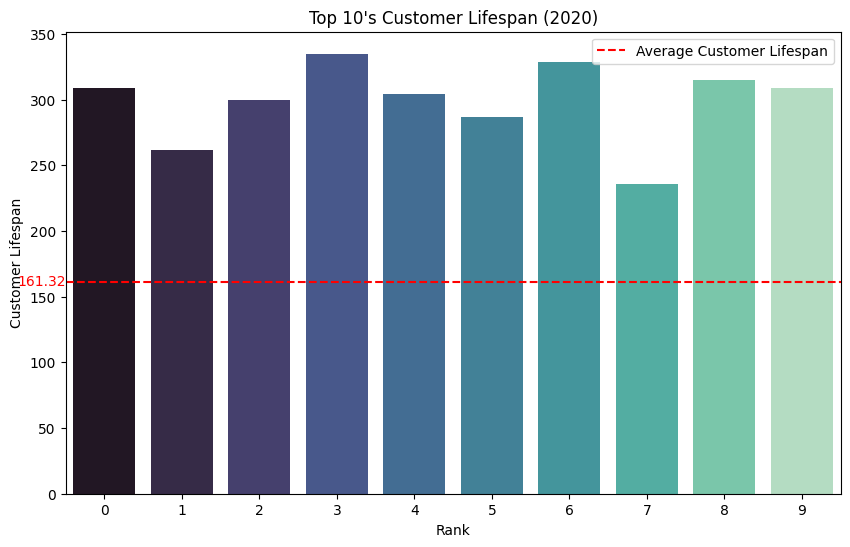

In [117]:
# CL

plt.figure(figsize=(10, 6))

sns.barplot(data=flo_cltv_top10, x=flo_cltv_top10.index, y='CL', palette='mako')
plt.xlabel('Rank')
plt.ylabel('Customer Lifespan')
plt.axhline(average_cl, color='red', ls='--', label='Average Customer Lifespan')
plt.title("Top 10's Customer Lifespan (2020)")

plt.text(-0.5, average_cl, f'{average_cl:.2f}', color='red', va='center', ha='right')

plt.legend()
save_fig('barplot_top10_cl.png')

plt.show()

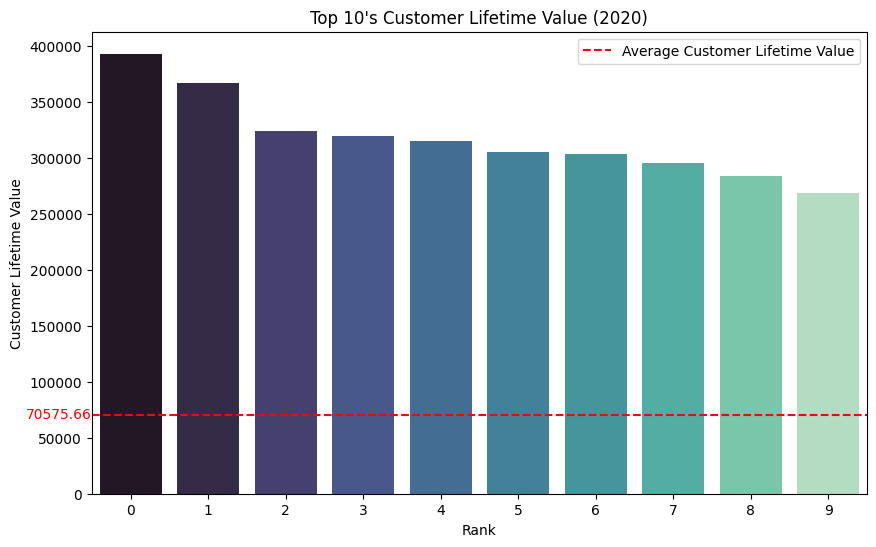

In [118]:
# CLTV

plt.figure(figsize=(10, 6))

sns.barplot(data=flo_cltv_top10, x=flo_cltv_top10.index, y='CLTV', palette='mako')
plt.xlabel('Rank')
plt.ylabel('Customer Lifetime Value')
plt.axhline(average_cltv, color='red', ls='--', label='Average Customer Lifetime Value')
plt.title("Top 10's Customer Lifetime Value (2020)")

plt.text(-0.5, average_cltv, f'{average_cltv:.2f}', color='red', va='center', ha='right')

plt.legend()
save_fig('barplot_top10_cltv.png')

plt.show()

### Lifetimes

In [119]:
!pip install lifetimes

In [120]:
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter

In [121]:
flo_cltv2 = flo_data.copy(deep=True)

In [122]:
target_date = flo_data['last_order_date'].max()
target_date

Timestamp('2021-05-30 00:00:00')

In [123]:
# F(freqeuncy)      고객 별 구매 횟수
# R(recency)        고객 별 첫 구매 ~ 마지막 구매까지의 시간
# T                 고객 별 첫 구매 ~ 집계일까지의 시간
# M(monetary value) 고객 별 평균 구매 금액

flo_cltv2['frequency'] = flo_cltv2['order_num_total']
flo_cltv2['recency'] = flo_cltv2['last_order_date'] - flo_cltv2['first_order_date']
flo_cltv2['T'] = target_date - flo_cltv2['first_order_date']
flo_cltv2['monetary'] = flo_cltv2['customer_value_total'] / flo_cltv2['order_num_total']

In [124]:
flo_cltv2['recency'] = flo_cltv2['recency'].dt.days
flo_cltv2['T'] = flo_cltv2['T'].dt.days

flo_cltv2['recency'] = flo_cltv2['recency'] / 7
flo_cltv2['T'] = flo_cltv2['T'] / 7

In [125]:
flo_cltv2.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,...,interested_in_categories_12_eng,last_order_day_offline,last_order_day_online,average_order_period,average_order_period_days,order_period_category,frequency,recency,T,monetary
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,...,[WOMAN],Friday,Sunday,23 days 19:12:00,23,"(20.15, 40.3]",5.0,17.000000,30.285714,187.874000
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,...,"[MAN, WOMAN]",Sunday,Friday,73 days 04:48:00,73,"(60.45, 80.6]",5.0,52.285714,78.571429,117.064000
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,...,"[ACTIVE CHILD, CHILD]",Wednesday,Sunday,5 days 12:00:00,5,"(-0.403, 20.15]",2.0,1.571429,20.571429,60.985000
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,...,[ACTIVE SPORTS],Saturday,Sunday,291 days 00:00:00,291,"(282.1, 302.25]",2.0,83.142857,95.142857,104.990000
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.0,2.0,150.87,...,[WOMAN],Saturday,Sunday,282 days 00:00:00,282,"(261.95, 282.1]",3.0,120.857143,132.000000,66.953333


In [126]:
bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(flo_cltv2['frequency'], flo_cltv2['recency'], flo_cltv2['T'])

<lifetimes.BetaGeoFitter: fitted with 16817 subjects, a: 0.00, alpha: 136.74, b: 0.00, r: 6.00>

In [127]:
bgf.conditional_expected_number_of_purchases_up_to_time(1, # week
                                                        flo_cltv2['frequency'],
                                                        flo_cltv2['recency'],
                                                        flo_cltv2['T']).sort_values(ascending=False).head(10)

6812     0.102145
19705    0.095650
1215     0.095152
12605    0.094876
16921    0.092634
11430    0.092491
6929     0.091434
644      0.090680
2217     0.090374
3564     0.088965
dtype: float64

In [128]:
bgf.conditional_expected_number_of_purchases_up_to_time(4, # 4 weeks = 1 month
                                                        flo_cltv2['frequency'],
                                                        flo_cltv2['recency'],
                                                        flo_cltv2['T']).sort_values(ascending=False).head(10)

6812     0.408581
19705    0.382601
1215     0.380607
12605    0.379502
16921    0.370536
11430    0.369965
6929     0.365737
644      0.362719
2217     0.361498
3564     0.355861
dtype: float64

In [129]:
bgf.conditional_expected_number_of_purchases_up_to_time(4 * 6,
                                                        flo_cltv2['frequency'],
                                                        flo_cltv2['recency'],
                                                        flo_cltv2['T']).sort_values(ascending=False).head(10)

6812     2.451487
19705    2.295604
1215     2.283645
12605    2.277013
16921    2.223216
11430    2.219788
6929     2.194422
644      2.176312
2217     2.168988
3564     2.135168
dtype: float64

In [130]:
bgf.conditional_expected_number_of_purchases_up_to_time(4 * 12, # year
                                                        flo_cltv2['frequency'],
                                                        flo_cltv2['recency'],
                                                        flo_cltv2['T']).sort_values(ascending=False).head(10)

6812     4.902975
19705    4.591208
1215     4.567289
12605    4.554027
16921    4.446433
11430    4.439576
6929     4.388844
644      4.352625
2217     4.337976
3564     4.270335
dtype: float64

In [131]:
flo_cltv2.iloc[6812]

master_id                            e688f572-1b71-11ea-9812-000d3a38a36f
order_channel                                                 Android App
last_order_channel                                            Android App
first_order_date                                      2019-09-21 00:00:00
last_order_date                                       2021-03-12 00:00:00
last_order_date_online                                2021-03-12 00:00:00
last_order_date_offline                               2019-11-02 00:00:00
order_num_total_ever_online                                           2.0
order_num_total_ever_offline                                          2.0
customer_value_total_ever_offline                                  195.97
customer_value_total_ever_online                                   231.97
interested_in_categories_12                            [KADIN, AKTIFSPOR]
order_num_total                                                       4.0
customer_value_total                  

In [132]:
ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(flo_cltv2['frequency'], flo_cltv2['monetary'])

<lifetimes.GammaGammaFitter: fitted with 16817 subjects, p: 4.17, q: 0.47, v: 4.09>

In [133]:
ggf.conditional_expected_average_profit(
    flo_cltv2['frequency'],
    flo_cltv2['monetary']).sort_values(ascending=False).head(10)

14819    726.533712
16618    717.263966
794      685.420228
4087     675.776918
14694    655.769850
16770    643.122010
11994    638.409756
19789    624.315687
16664    622.832101
5214     603.678895
dtype: float64

In [134]:
flo_cltv2['cltv_pred_3_months'] = ggf.customer_lifetime_value(bgf,
                                    flo_cltv2['frequency'],
                                    flo_cltv2['recency'],
                                    flo_cltv2['T'],
                                    flo_cltv2['monetary'],
                                    time=3,
                                    freq='W',
                                    discount_rate=0.01)

flo_cltv2.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,...,last_order_day_offline,last_order_day_online,average_order_period,average_order_period_days,order_period_category,frequency,recency,T,monetary,cltv_pred_3_months
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,...,Friday,Sunday,23 days 19:12:00,23,"(20.15, 40.3]",5.0,17.000000,30.285714,187.874000,162.955952
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,...,Sunday,Friday,73 days 04:48:00,73,"(60.45, 80.6]",5.0,52.285714,78.571429,117.064000,78.972675
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,...,Wednesday,Sunday,5 days 12:00:00,5,"(-0.403, 20.15]",2.0,1.571429,20.571429,60.985000,43.733747
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,...,Saturday,Sunday,291 days 00:00:00,291,"(282.1, 302.25]",2.0,83.142857,95.142857,104.990000,50.383462
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.0,2.0,150.87,...,Saturday,Sunday,282 days 00:00:00,282,"(261.95, 282.1]",3.0,120.857143,132.000000,66.953333,30.529489


In [135]:
flo_cltv2['cltv_pred_6_months'] = ggf.customer_lifetime_value(bgf,
                                    flo_cltv2['frequency'],
                                    flo_cltv2['recency'],
                                    flo_cltv2['T'],
                                    flo_cltv2['monetary'],
                                    time=6,
                                    freq='W',
                                    discount_rate=0.01)

flo_cltv2.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,...,last_order_day_online,average_order_period,average_order_period_days,order_period_category,frequency,recency,T,monetary,cltv_pred_3_months,cltv_pred_6_months
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,...,Sunday,23 days 19:12:00,23,"(20.15, 40.3]",5.0,17.000000,30.285714,187.874000,162.955952,321.119394
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,...,Friday,73 days 04:48:00,73,"(60.45, 80.6]",5.0,52.285714,78.571429,117.064000,78.972675,155.622775
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,...,Sunday,5 days 12:00:00,5,"(-0.403, 20.15]",2.0,1.571429,20.571429,60.985000,43.733747,86.181291
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,...,Sunday,291 days 00:00:00,291,"(282.1, 302.25]",2.0,83.142857,95.142857,104.990000,50.383462,99.285154
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.0,2.0,150.87,...,Sunday,282 days 00:00:00,282,"(261.95, 282.1]",3.0,120.857143,132.000000,66.953333,30.529489,60.161111


In [136]:
flo_cltv2['segment'] = pd.qcut(flo_cltv2['cltv_pred_6_months'], 5, labels=['E', 'D', 'C', 'B', 'A'])
flo_cltv2.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,...,average_order_period,average_order_period_days,order_period_category,frequency,recency,T,monetary,cltv_pred_3_months,cltv_pred_6_months,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,...,23 days 19:12:00,23,"(20.15, 40.3]",5.0,17.000000,30.285714,187.874000,162.955952,321.119394,A
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,...,73 days 04:48:00,73,"(60.45, 80.6]",5.0,52.285714,78.571429,117.064000,78.972675,155.622775,C
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,...,5 days 12:00:00,5,"(-0.403, 20.15]",2.0,1.571429,20.571429,60.985000,43.733747,86.181291,E
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,...,291 days 00:00:00,291,"(282.1, 302.25]",2.0,83.142857,95.142857,104.990000,50.383462,99.285154,E
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.0,2.0,150.87,...,282 days 00:00:00,282,"(261.95, 282.1]",3.0,120.857143,132.000000,66.953333,30.529489,60.161111,E


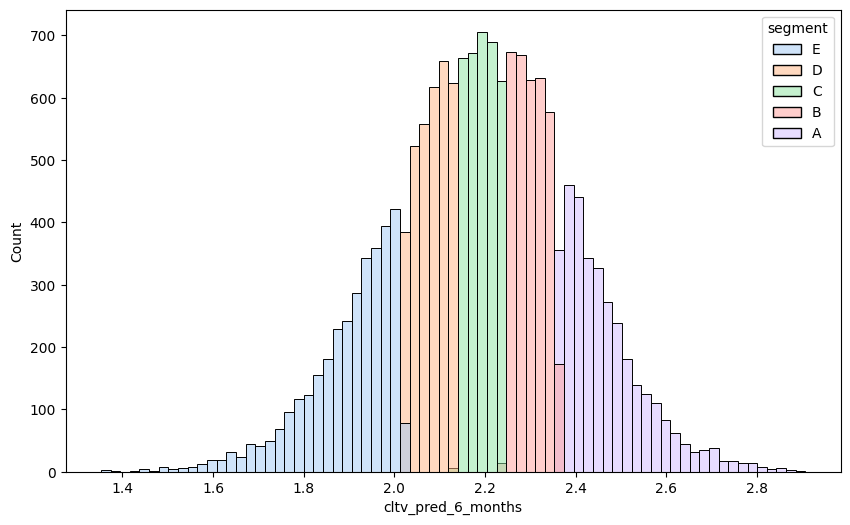

In [137]:
plt.figure(figsize=(10, 6))
sns.histplot(x=np.log10(flo_cltv2['cltv_pred_6_months']), hue = flo_cltv2['segment'], palette='pastel')
save_fig('histplot_cltv_pred_segmented.png')

plt.show()

In [138]:
flo_cltv2_2020 = flo_cltv2[(flo_cltv2['first_order_date'] >= event_start) & (flo_cltv2['last_order_date'] <= event_end)].reset_index(drop=True)

In [139]:
comp_1 = flo_cltv.sort_values(by='CLTV', ascending=False)[columns].head(50).reset_index(drop=True)
comp_2 = flo_cltv2_2020.sort_values(by='cltv_pred_6_months', ascending=False).head(50).reset_index(drop=True)

In [140]:
lst_one = [1,2,1,2,1,2,3,4,3,3,4,3,]
lst_two = [1,2,1,2,1,2,3,3,3,3,5,5,5]

print(set(lst_one) & set(lst_two))

{1, 2, 3}


In [141]:
len(set(comp_1['master_id']) & set(comp_2['master_id']))

8

In [142]:
print(comp_1['customer_value_total'].mean())
print(comp_1['frequency'].mean(), '\n')

print(comp_2['customer_value_total'].mean())
print(comp_2['frequency'].mean())

823.2472
2.86 

997.3019999999998
2.64
